# Agro-Food CO2 Emission

## About Dataset

The agricultural CO2 emission dataset has been constructed by merging and reprocessing approximately a dozen individual datasets from the Food and Agriculture Organization (FAO) and data from IPCC. These datasets were, cleaned, preprocessed and merged together to create a comprehensive and cohesive dataset for analysis and forecasting purposes.

The dataset describes CO2 emissions related to agri-food, which amount to approximately 18% of the global annual emissions.

The emissions from the agri-food sector are significant when studying climate change. As the dataset shows, these emissions contribute to a substantial portion of the global annual emissions. 
Understanding and addressing the environmental impact of the agri-food industry is crucial for mitigating climate change and developing sustainable practices within this sector.

### Key Features:

    Savanna fires: Emissions from fires in savanna ecosystems.
    Forest fires: Emissions from fires in forested areas.
    Crop Residues: Emissions from burning or decomposing leftover plant material after crop harvesting.
    Rice Cultivation: Emissions from methane released during rice cultivation.
    Drained organic soils (CO2): Emissions from carbon dioxide released when draining organic soils.
    Pesticides Manufacturing: Emissions from the production of pesticides.
    Food Transport: Emissions from transporting food products.
    Forestland: Land covered by forests.
    Net Forest conversion: Change in forest area due to deforestation and afforestation.
    Food Household Consumption: Emissions from food consumption at the household level.
    Food Retail: Emissions from the operation of retail establishments selling food.
    On-farm Electricity Use: Electricity consumption on farms.
    Food Packaging: Emissions from the production and disposal of food packaging materials.
    Agrifood Systems Waste Disposal: Emissions from waste disposal in the agrifood system.
    Food Processing: Emissions from processing food products.
    Fertilizers Manufacturing: Emissions from the production of fertilizers.
    IPPU: Emissions from industrial processes and product use.
    Manure applied to Soils: Emissions from applying animal manure to agricultural soils.
    Manure left on Pasture: Emissions from animal manure on pasture or grazing land.
    Manure Management: Emissions from managing and treating animal manure.
    Fires in organic soils: Emissions from fires in organic soils.
    Fires in humid tropical forests: Emissions from fires in humid tropical forests.
    On-farm energy use: Energy consumption on farms.
    Rural population: Number of people living in rural areas.
    Urban population: Number of people living in urban areas.
    Total Population - Male: Total number of male individuals in the population.
    Total Population - Female: Total number of female individuals in the population.
    total_emission: Total greenhouse gas emissions from various sources.
    Average Temperature °C: The average increasing of temperature (by year) in degrees Celsius,


### Note

    CO2 is recorded in kilotons (kt): 1 kt represents 1000 kg of CO2.
    The feature "Average Temperature C°", which can be used as the target for machine learning models, represents the average yearly temperature increase. For example, if it is 0.12, it means that the temperature in that specific location increased by
    0.12 degrees Celsius.
    Forestland is the only feature that exhibits negative emissions due to its role as a carbon sink. Through photosynthesis, forests absorb and store carbon dioxide, effectively removing it from the atmosphere. Sustainable forest management, along with afforestation and reforestation efforts, further contribute to negative emissions by increasing carbon sequestration capacity.

## Objectives

- Is there a direct correlation between emission, population growth and temperature increase?
- How do the certain regions contribute to the emissions?
- Which are the most and least polluting countries?
- Which regions are the most effected ones?
- What are the emissions per capita in the different regions, which region is producing the most emissions.
- Which countries are with the most negative emissions due to Forestland and what is their correlation with their total emission and population?
- Is the emission difference between regions significant?
- What are the predictions for the next few years/decade?

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import random
import seaborn as sns
import matplotlib.cm as cm
import json

import warnings
warnings.filterwarnings("ignore")

In [285]:
df = pd.read_csv('Agrofood_co2_emission.csv')
pd.set_option('display.max_columns', None)
df.head()

,Area,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,Net_Forest_conversion,Food_Household_Consumption,Food_Retail,On-farm_Electricity_Use,Food_Packaging,Agrifood_Systems_Waste_Disposal,Food_Processing,Fertilizers_Manufacturing,IPPU,Manure_applied_to_Soils,Manure_left_on_Pasture,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban population,Total_Population_Male,Total_Population_Female,total_emission,Average_Temperature_C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,0.0,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.9970,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,0.0,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.8539,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,0.0,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.4929,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,0.0,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.0559,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,0.0,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.1269,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


Replacing some of the countries name with a shorter name.

In [287]:
df = df.replace(to_replace = ["Bolivia (Plurinational State of)",
                         "Democratic People's Republic of Korea",
                         "Democratic Republic of the Congo",
                         "Ethiopia PDR",
                         "Falkland Islands (Malvinas)",
                         "Iran (Islamic Republic of)",
                         "Lao People's Democratic Republic",
                         "Micronesia (Federated States of)",
                         "Netherlands (Kingdom of the)",
                         "Netherlands Antilles (former)",
                         "Republic of Moldova",
                         "Russian Federation",
                         "Sudan (former)",
                         "Syrian Arab Republic",
                         "United Republic of Tanzania",
                         "United States Virgin Islands",
                         "Venezuela (Bolivarian Republic of)",
                         "Viet Nam",
                         "Republic of Korea",
                         "Czechia",
                         "China, Taiwan Province of",
                         "Belgium-Luxembourg"],
            value = ['Bolivia',
                     'North Korea',
                     'Congo',
                     'Ethiopia',
                     'Falkland Islands',
                     'Iran',
                     'Laos',
                     'Micronesia',
                     'Netherlands',
                     'Netherlands Antilles',
                     'Moldova',
                     'Russia',
                     'Sudan',
                     'Syria',
                     'Tanzania',
                     'US Virgin Islands',
                     'Venezuela',
                     'Vietnam',
                     'South Korea',
                     'Czech Republic',
                     'Taiwan',
                     'Luxembourg'])

In [392]:
df.isna().sum()

Area                                  0
Year                                  0
Savanna_fires                         0
Forest_fires                          0
Crop_Residues                      1389
Rice_Cultivation                      0
Drained_organic_soils_(CO2)           0
Pesticides_Manufacturing              0
Food_Transport                        0
Forestland                          493
Net_Forest_conversion                 0
Food_Household_Consumption          473
Food_Retail                           0
On-farm_Electricity_Use               0
Food_Packaging                        0
Agrifood_Systems_Waste_Disposal       0
Food_Processing                       0
Fertilizers_Manufacturing             0
IPPU                                743
Manure_applied_to_Soils             928
Manure_left_on_Pasture                0
Manure_Management                   928
Fires_in_organic_soils                0
Fires_in_humid_tropical_forests       0
On-farm_energy_use                  956


The dataset has been preprocessed for analysis and forecasting but there are still some missing data. \n
We look at them one by one and decide the best cleaning practice.


Before we start cleaning our data we create new columns that we can use for cleaning and analysis later. We add where the country is located by continent and region.

In [391]:
continents = json.load(open('continents.json','r'))
world_regions = json.load(open('world_regions.json','r'))

def assign_continent(area):
    for continent, country in continents.items():
        if area in country:
            return continent

df['Continents'] = df.loc[:,'Area'].apply(assign_continent)

def assign_region(area):
    for continent, country in world_regions.items():
        if area in country:
            return continent
df['World_regions'] = df.loc[:,'Area'].apply(assign_region)

Also adding an extra column to the dataset for the total population, calculated from the total male and female population for each year.

In [290]:
df['total_population'] = df.loc[:,'Total_Population_Male'] + df.loc[:,'Total_Population_Female']

In [291]:
pd.set_option('display.max_row', None)
missing = df[df['Forest_fires'].isna() == True]
missing['Area'].unique()

array([], dtype=object)

- Savanna Fires - the only country with missing data is the Holy See - The missing values can be filled with zero as we can be sure there is no savanna in Holy See.
- Forest Fires - the countries with no data are the Holy see, Monaco and San Marino which are city-states or microstates - We fill the missing values with zeros.
- Crop Residues - Data missing for: American Samoa', 'Andorra', 'Anguilla', 'Aruba', 'Bahrain',
                                'Bermuda', 'British Virgin Islands', 'Cayman Islands',
                                'Channel Islands', 'China, Hong Kong SAR', 'China, Macao SAR',
                                'Cook Islands', 'Equatorial Guinea', 'Falkland Islands',
                                'Gibraltar', 'Greenland', 'Guadeloupe', 'Guam', 'Holy See',
                                'Isle of Man', 'Kiribati', 'Liechtenstein', 'Marshall Islands',
                                'Martinique', 'Mayotte', 'Monaco', 'Montserrat', 'Nauru',
                                'Netherlands Antilles', 'Niue',
                                'Northern Mariana Islands', 'Palau', 'Palestine',
                                'Saint Helena, Ascension and Tristan da Cunha',
                                'Saint Kitts and Nevis', 'Saint Lucia',
                                'Saint Pierre and Miquelon', 'Samoa', 'San Marino', 'Seychelles',
                                'Singapore', 'Tokelau', 'Tonga', 'Turks and Caicos Islands',
                                'Tuvalu', 'United States Virgin Islands',
                                'Wallis and Futuna Islands', 'Western Sahara'
- Forestland/Net Forest conversion - Data missing for : Anguilla', 'Antigua and Barbuda', 'Bermuda',
                                'British Virgin Islands', 'Channel Islands',
                                'China, Hong Kong SAR', 'China, Macao SAR',
                                'Taiwan, 'Isle of Man', 'Kiribati',
                                'North Macedonia', 'Palau', 'Palestine', 'Saint Kitts and Nevis',
                                'United Arab Emirates', 'Vanuatu'
- Food Household Consumption - Data missing for: 'Belgium-Luxembourg', 'British Virgin Islands', 'Channel Islands',
                                'Cook Islands', 'Ethiopia PDR', 'Falkland Islands',
                                'Gambia', 'Guam', 'Liberia', 'Marshall Islands', 'Martinique',
                                'Micronesia', 'Montserrat', 'Namibia',
                                'Northern Mariana Islands', 'Pacific Islands Trust Territory',
                                'Palau', 'Saint Helena, Ascension and Tristan da Cunha',
                                'Saint Pierre and Miquelon', 'Serbia and Montenegro', 'Somalia',
                                'Timor-Leste', 'Tokelau', 'US Virgin Islands',
                                'Wallis and Futuna Islands', 'Western Sahara'
- IPPU - Missing data for 'American Samoa', 'Bermuda', 'Cayman Islands', 'Channel Islands',
                                'Falkland Islands', 'Faroe Islands', 'French Polynesia',
                                'Gibraltar', 'Greenland', 'Guadeloupe', 'Guam', 'Isle of Man',
                                'Martinique', 'Mayotte', 'Montserrat', 'New Caledonia',
                                'Northern Mariana Islands', 'Palestine', 'Puerto Rico',
                                'Saint Pierre and Miquelon', 'Tokelau',
                                'US Virgin Islands', 'Wallis and Futuna Islands',
                                'Western Sahara'
- Manure applied to Soils/Manure Management - Missing data for: 'American Samoa', 'Andorra', 'Anguilla', 'Aruba', 'Bermuda',
                                'British Virgin Islands', 'Cayman Islands', 'Channel Islands',
                                'Falkland Islands (Malvinas)', 'Gibraltar', 'Greenland',
                                'Guadeloupe', 'Guam', 'Holy See', 'Isle of Man', 'Liechtenstein',
                                'Maldives', 'Marshall Islands', 'Martinique', 'Mayotte',
                                'Micronesia', 'Monaco', 'Montserrat',
                                'Netherlands Antilles', 'Northern Mariana Islands',
                                'Pacific Islands Trust Territory', 'Palau', 'Palestine',
                                'Saint Helena, Ascension and Tristan da Cunha',
                                'Saint Pierre and Miquelon', 'San Marino',
                                'Turks and Caicos Islands', 'US Virgin Islands',
                                'Wallis and Futuna Islands', 'Western Sahara'
- Fires in humid tropical forests - Data missing for:'Channel Islands', 'Holy See', 'Liechtenstein', 'Monaco','San Marino' - we can set these to zero wih confidence.
- On-farm energy use - Data missing for: 'Afghanistan', 'Bahrain', 'Luxembourg', 'Burkina Faso',
                                'Cameroon', 'Channel Islands', 'China, Hong Kong SAR',
                                'Czechoslovakia', 'Democratic Republic of the Congo', 'Eritrea',
                                'Ethiopia', 'Fiji', 'Germany', 'Guam', 'Holy See', 'Iraq',
                                'Isle of Man', 'Kuwait', 'Lesotho', 'Libya', 'Madagascar',
                                'Marshall Islands', 'Micronesia', 'Monaco',
                                'Namibia', 'Niger', 'Northern Mariana Islands', 'Oman',
                                'Pacific Islands Trust Territory', 'Palau', 'Paraguay',
                                'Puerto Rico', 'San Marino', 'Saudi Arabia',
                                'Serbia and Montenegro', 'Singapore', 'Timor-Leste', 'Togo',
                                'Tokelau', 'Turkmenistan', 'United Arab Emirates',
                                'US Virgin Islands', 'Western Sahara', 'Yemen'

- There are 11 categories with missing data and 3 of them where the data can be set to zero with high confidence. These are the Savanna and Forest fires and Fires in humid tropical forests.
- We have to make the assumption that due to conservation efforts the Net Forest Conversion is close to zero in the countries where we have no data. These are mainly tropical islands, small islands, city states or mostly desert country (UAE).
- Hence assuming that the Forestland hasn't changed significantly as we set the Net Forest Conversion to zero. Using data for the missing values from https://ourworldindata.org and ...

In [292]:
df['Savanna_fires'].mask(df['Savanna_fires'].isna() == True, 0, inplace = True)
df['Forest_fires'].mask(df['Forest_fires'].isna() == True, 0, inplace = True)
df['Fires_in_humid_tropical_forests'].mask(df['Fires_in_humid_tropical_forests'].isna() == True, 0, inplace = True)
df['Net_Forest_conversion'].mask(df['Net_Forest_conversion'].isna() == True, 0, inplace = True)
#df[df['Area'] == 'Holy See']

We exclude Chine from the dataset as it's a duplicate. China here represents the mainland and the territorial parts like Macao, Hond Kong etc that included in the dataset separately.

In [294]:
df = df[df['Area'] != 'China']

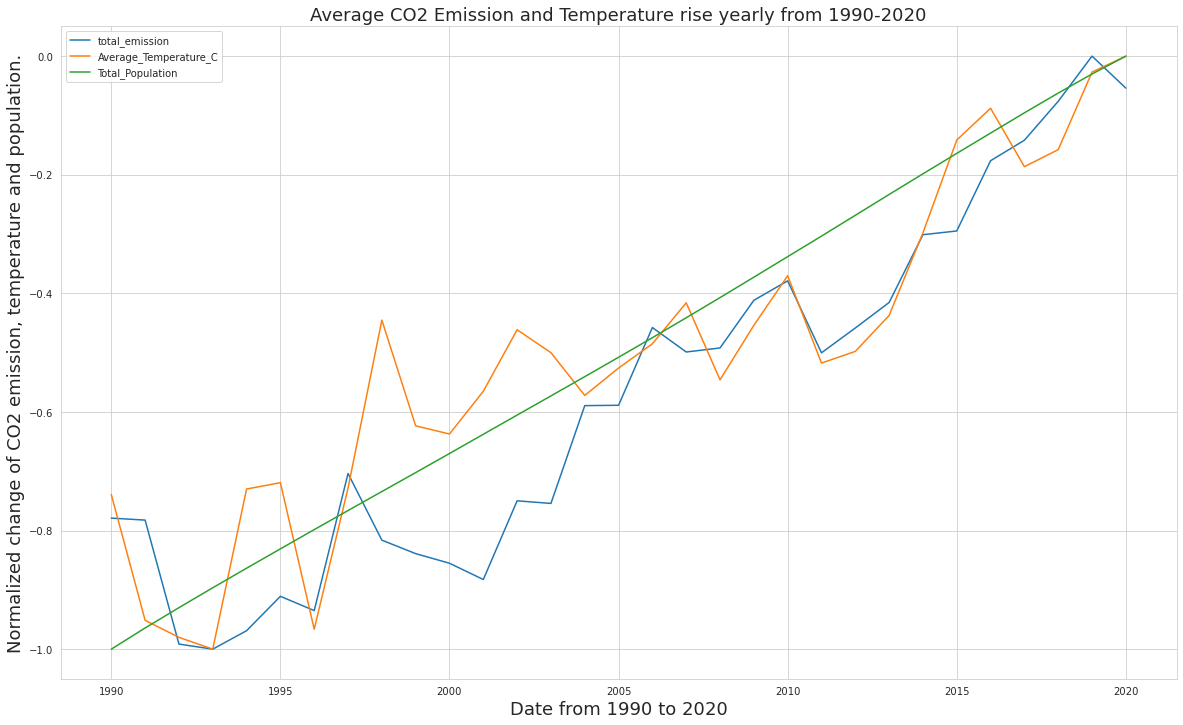

In [295]:
def normalize(df):
    n = (df-df.max())/(df.max()-df.min())
    return n

df_year = df.groupby('Year')['total_emission','Average_Temperature_C'].mean()
df_pop = df.groupby('Year')['Total_Population_Male','Total_Population_Female'].sum()
df_year['Total_Population'] = df_pop.sum(axis = 1)
df_year_norm = normalize(df_year)

df_year_norm.plot(figsize=(20, 12))
plt.title('Average CO2 Emission and Temperature rise yearly from 1990-2020', fontsize = 18)
plt.xlabel('Date from 1990 to 2020', fontsize = 18)
plt.ylabel('Normalized change of CO2 emission, temperature and population.', fontsize = 18)
plt.show()

The total emissions over the 31 years period plotted by the individual sources. The only negative is the Forestland that is a carbon sink.

Text(0, 0.5, 'Emission of CO2')

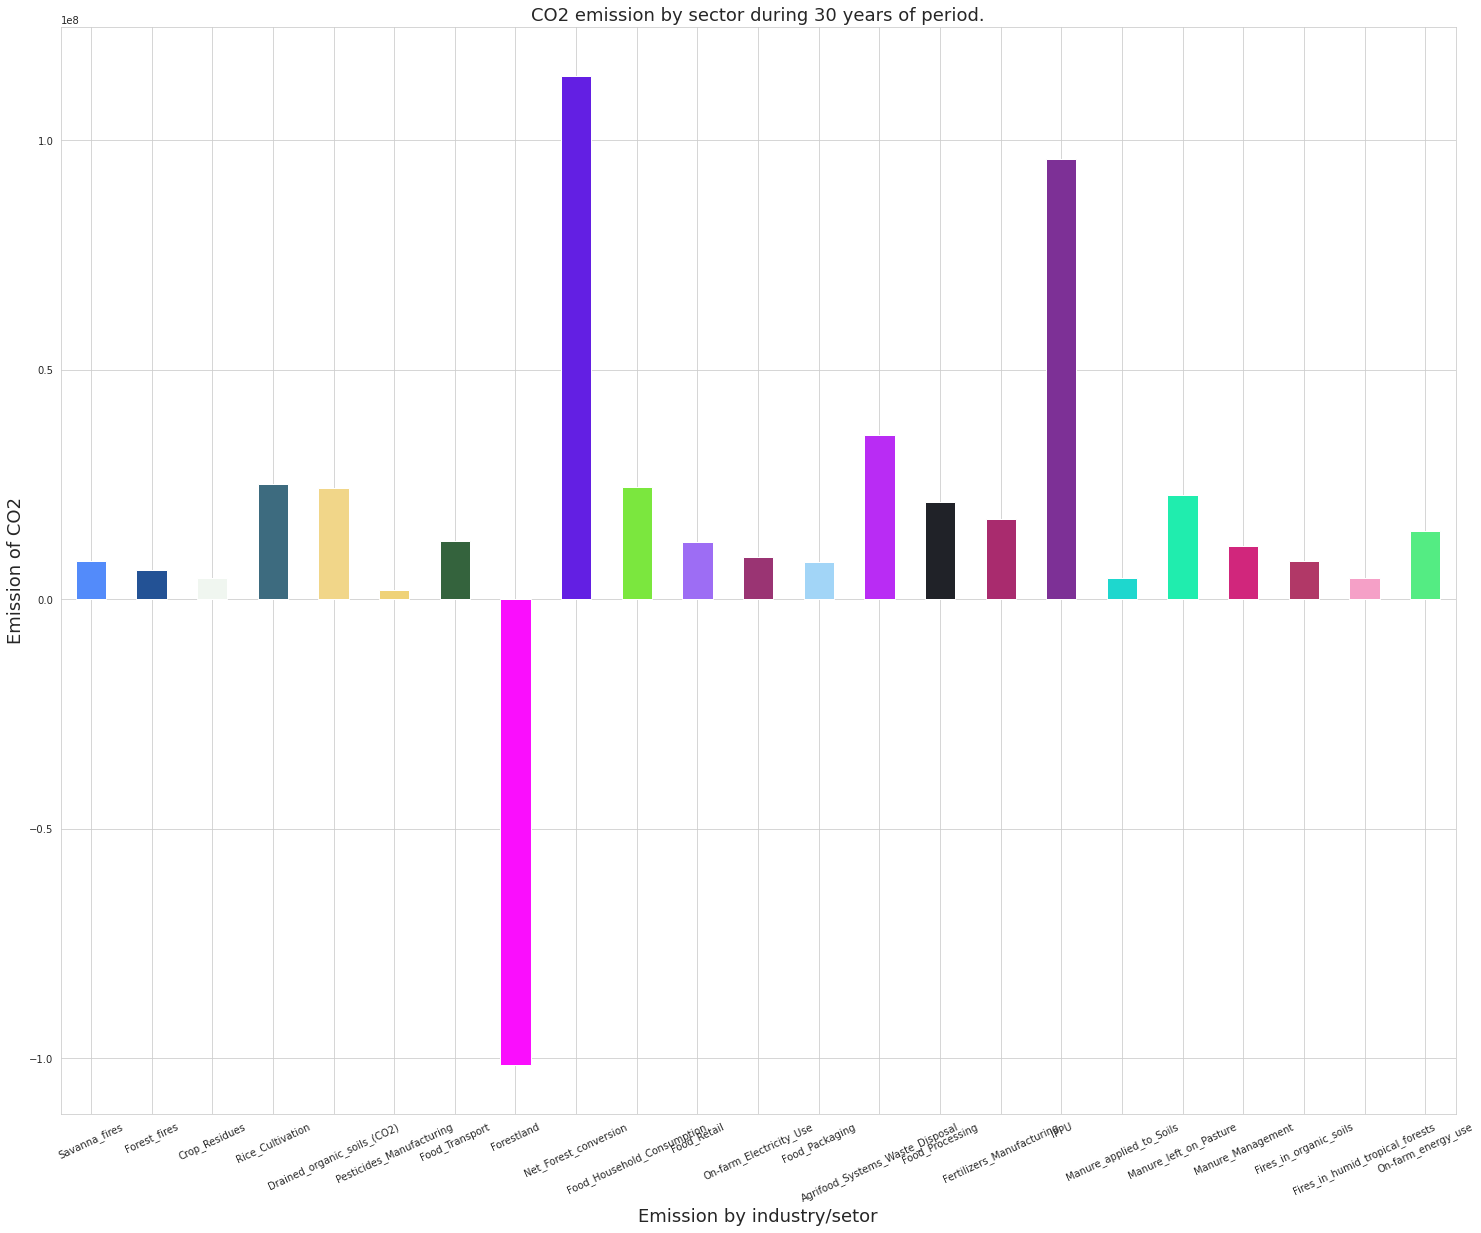

In [296]:

df_emitter = df.groupby('Year')[['Savanna_fires','Forest_fires', 'Crop_Residues',
                                 'Rice_Cultivation', 'Drained_organic_soils_(CO2)',  'Pesticides_Manufacturing',
                                 'Food_Transport', 'Forestland', 'Net_Forest_conversion',
                                 'Food_Household_Consumption', 'Food_Retail', 'On-farm_Electricity_Use',
                                 'Food_Packaging', 'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
                                 'Fertilizers_Manufacturing', 'IPPU', 'Manure_applied_to_Soils',
                                 'Manure_left_on_Pasture', 'Manure_Management', 'Fires_in_organic_soils',
                                 'Fires_in_humid_tropical_forests', 'On-farm_energy_use']].sum()

df_emitter_tot = df_emitter.sum(axis = 0)
no_of_col = 23
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(no_of_col)]
df_emitter_tot.plot(kind = 'bar', figsize = (25, 20), color = colors, rot = 25)
plt.title('CO2 emission by sector during 30 years of period.', fontsize = 18)
plt.xlabel('Emission by industry/setor', fontsize = 18)
plt.ylabel('Emission of CO2', fontsize = 18)

In [297]:
df_totalemi = df.groupby('Area')['total_emission'].sum()
df_totalemi = pd.DataFrame(df_totalemi)
df_totalemi = df_totalemi.sort_values('total_emission', ascending = False)
df_top10 = df_totalemi.head(10).reset_index()
df_top10

,Area,total_emission
0,"China, mainland",5.662423e+07
1,Brazil,3.659621e+07
2,Indonesia,2.821637e+07
3,United States of America,2.319088e+07
4,India,1.972033e+07
5,Congo,1.706524e+07
6,Canada,9.798652e+06
7,Japan,6.923093e+06
8,Mexico,6.697904e+06
9,Germany,6.229363e+06


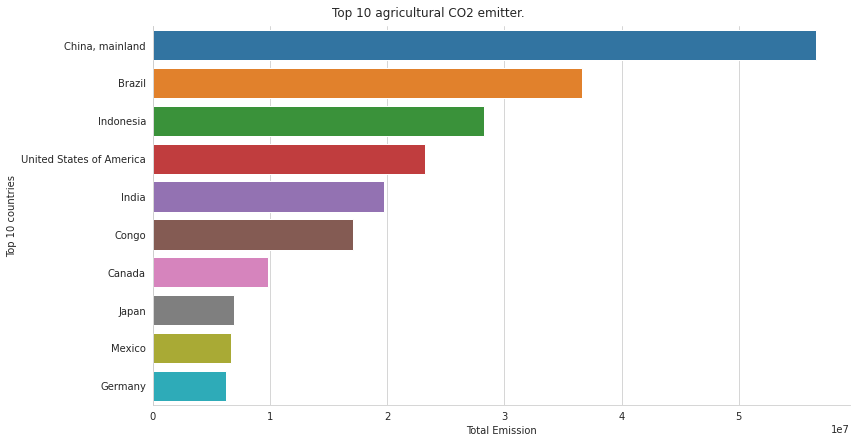

In [298]:
g = sns.catplot(x = 'total_emission',
            y = 'Area',
            data = df_top10,
            kind = 'bar',
            ci = None,
            height = 6,
            aspect = 2)
g.fig.suptitle('Top 10 agricultural CO2 emitter.', y = 1.02)
g.set(xlabel = 'Total Emission',
      ylabel = 'Top 10 countries')
plt.show()

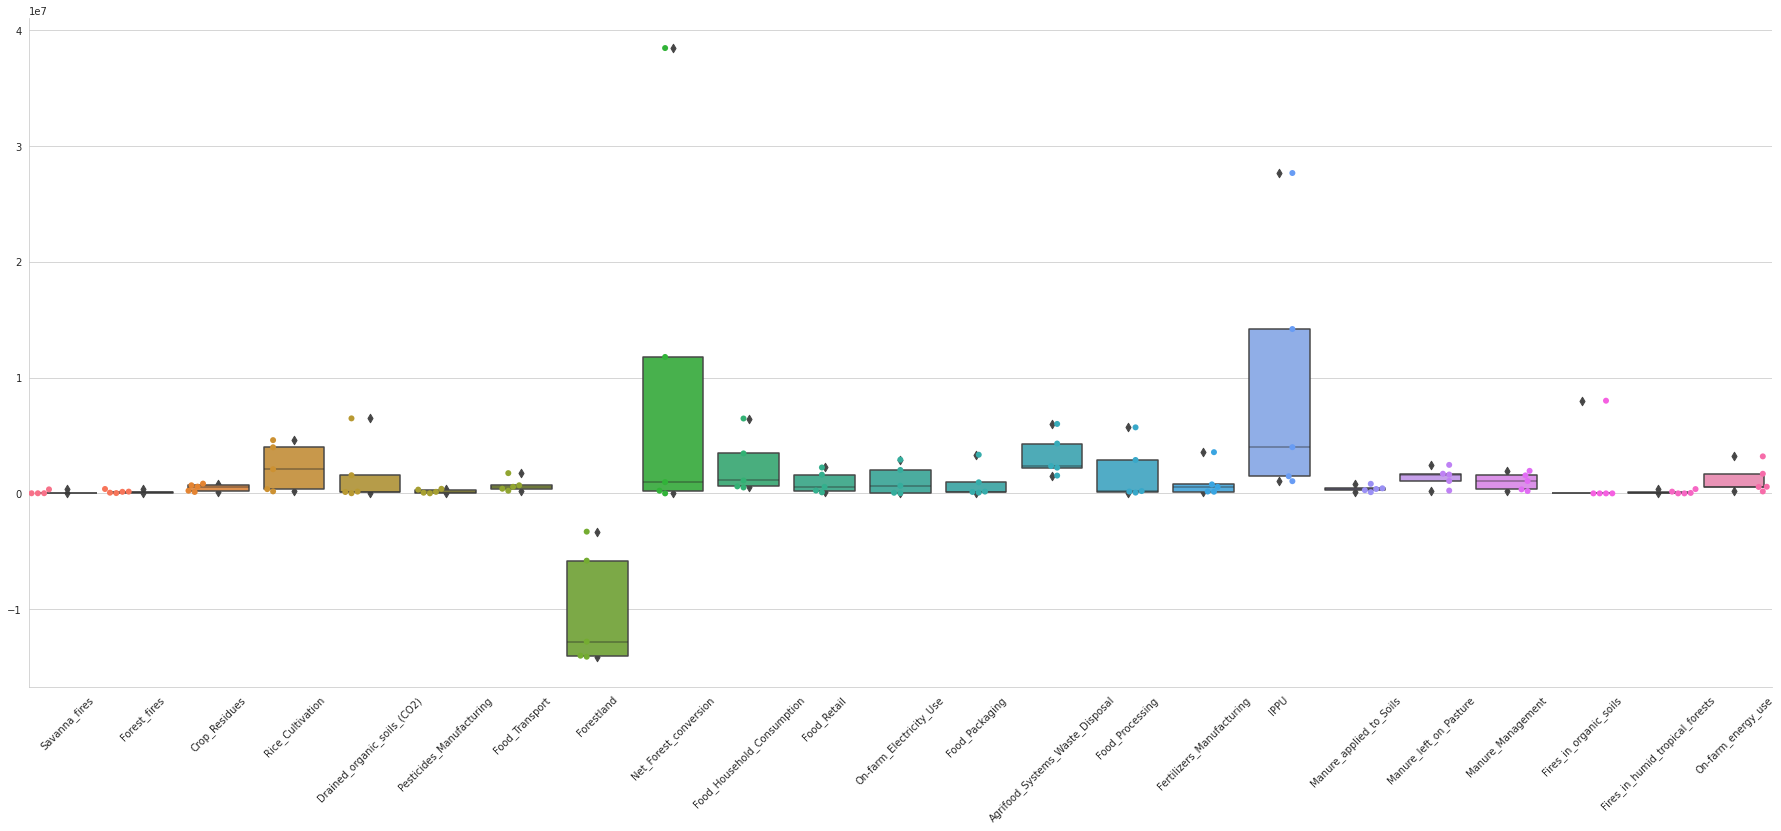

In [300]:
top5 = ['China, mainland','Brazil','Indonesia','United States of America', 'India']
df_top_bool = df['Area'].isin(top5)
df_top5 = df[df_top_bool]

df_top5_grp = df_top5.groupby('Area')[['Savanna_fires','Forest_fires', 'Crop_Residues',
                                       'Rice_Cultivation', 'Drained_organic_soils_(CO2)',  'Pesticides_Manufacturing',
                                       'Food_Transport', 'Forestland', 'Net_Forest_conversion',
                                       'Food_Household_Consumption', 'Food_Retail', 'On-farm_Electricity_Use',
                                       'Food_Packaging', 'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
                                       'Fertilizers_Manufacturing', 'IPPU', 'Manure_applied_to_Soils',
                                       'Manure_left_on_Pasture', 'Manure_Management', 'Fires_in_organic_soils',
                                       'Fires_in_humid_tropical_forests', 'On-farm_energy_use']].sum()

df_top5_grp.reset_index()
sns.catplot(data = df_top5_grp,
            kind = 'boxen',
            height=10, 
            aspect=2.5,
            errorbar = None)
sns.swarmplot(data = df_top10_grp, size = 6, dodge = True)
plt.xticks(rotation = 45)
plt.show()

In [301]:
df_bottom10 = df_totalemi.tail(10).reset_index()
df_bottom10

,Area,total_emission
0,Bhutan,-2.412280e+01
1,Georgia,-4.730578e+04
2,Latvia,-5.110531e+04
3,Serbia and Montenegro,-5.933866e+04
4,Slovenia,-6.546388e+04
5,Finland,-9.975058e+04
6,Bulgaria,-3.108318e+05
7,Romania,-4.778241e+05
8,Chile,-5.811333e+05
9,Russia,-4.323756e+06


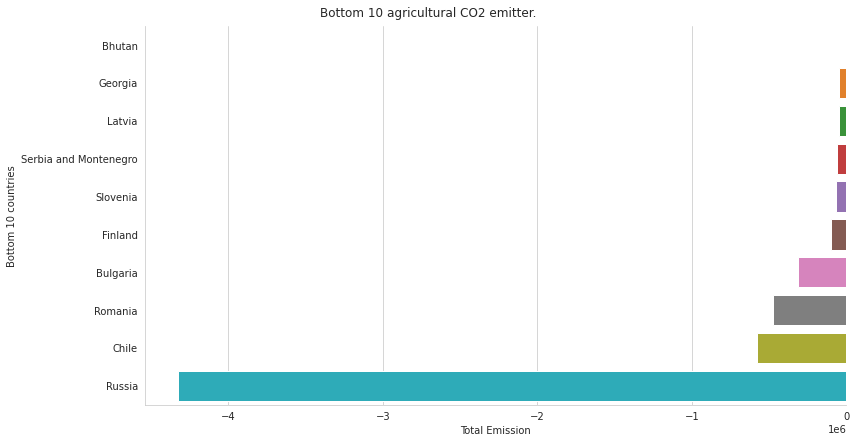

In [302]:
g = sns.catplot(x = 'total_emission',
            y = 'Area',
            data = df_bottom10,
            kind = 'bar',
            ci = None,
            height = 6,
            aspect = 2)
g.fig.suptitle('Bottom 10 agricultural CO2 emitter.', y = 1.02)
g.set(xlabel = 'Total Emission',
      ylabel = 'Bottom 10 countries')
plt.show()

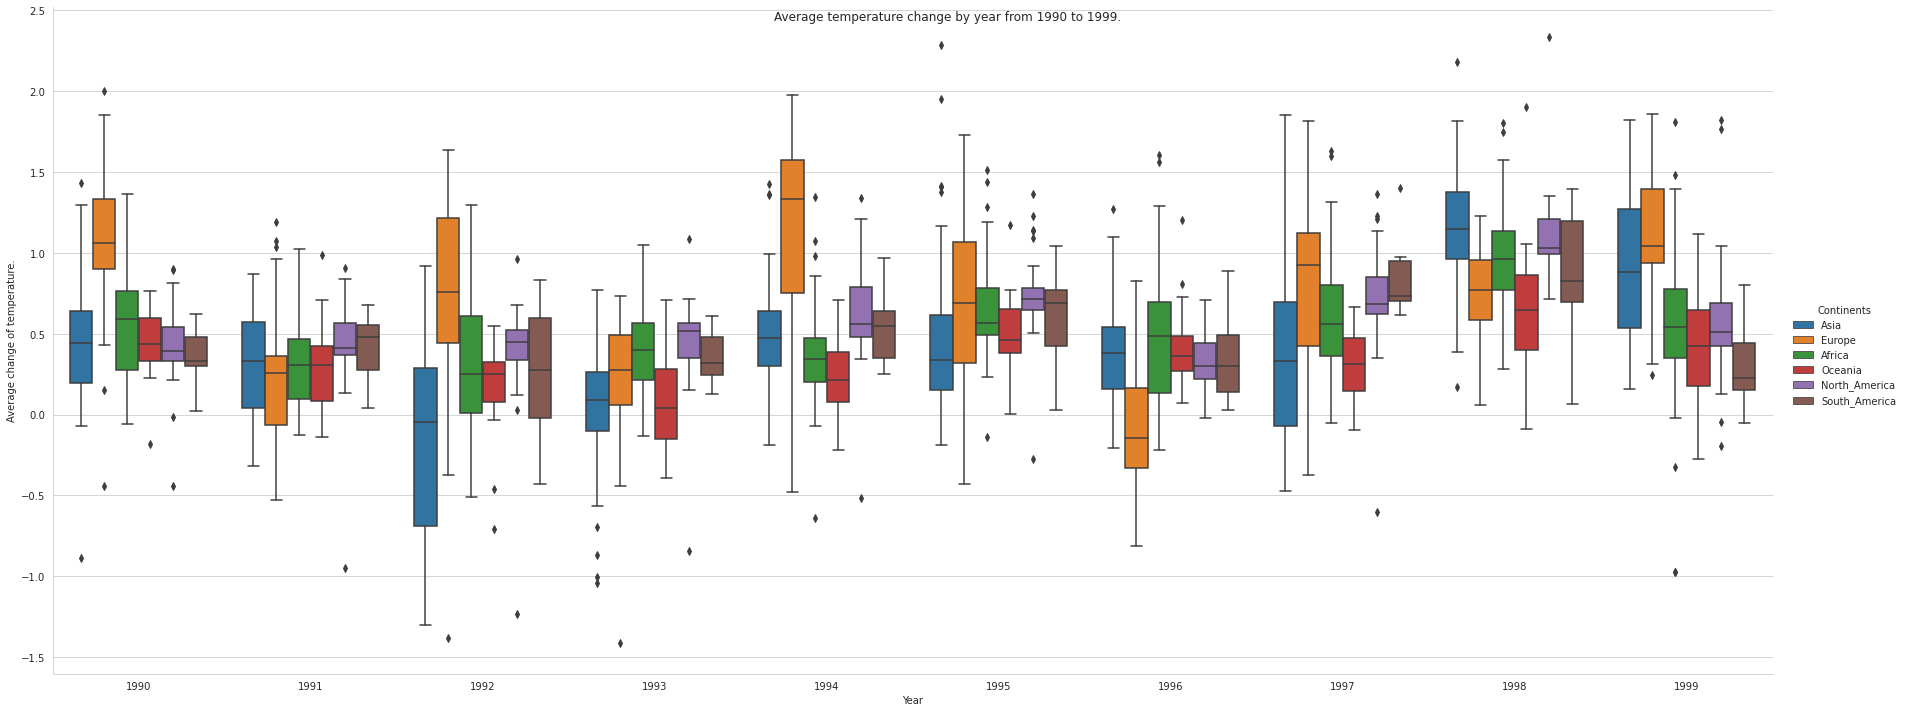

In [304]:
df_1990_1999 = df.query('Year >= 1990 and Year <= 1999')

sns.set_style('whitegrid')
g = sns.catplot(x = 'Year',
                y = 'Average_Temperature_C',
                data = df_1990_1999,
                kind = 'box',
                hue = 'Continents',
                height=10, 
                aspect=2.5
                )
g.fig.suptitle('Average temperature change by year from 1990 to 1999.')
g.set(xlabel = 'Year',
      ylabel = 'Average change of temperature.')
plt.show()

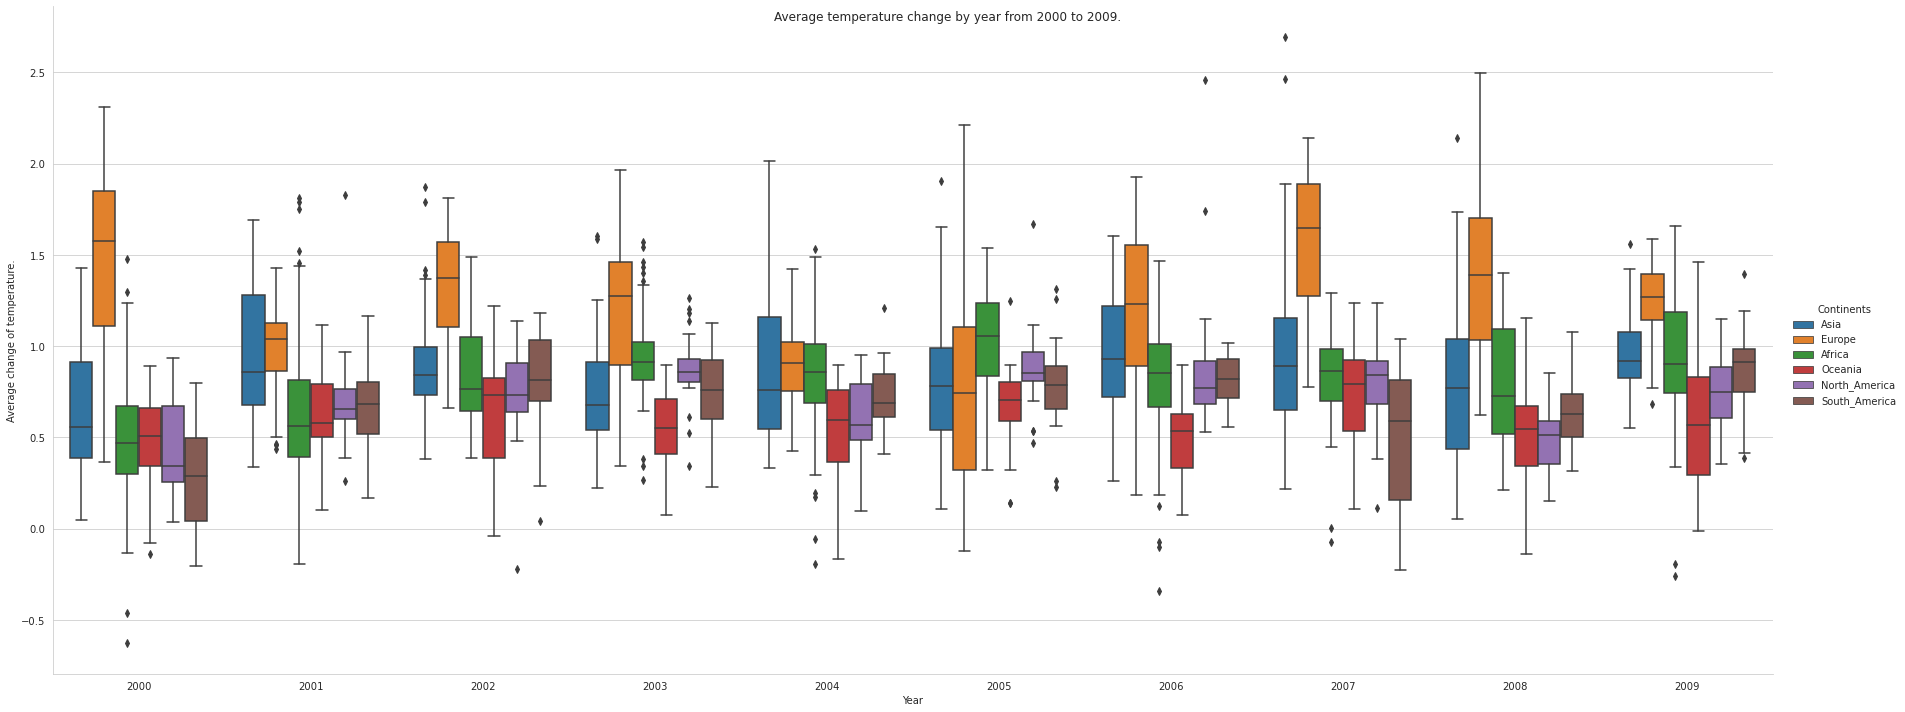

In [305]:
df_2000_2009 = df.query('Year >= 2000 and Year <= 2009')
sns.set_style('whitegrid')
g = sns.catplot(x = 'Year',
                y = 'Average_Temperature_C',
                data = df_2000_2009,
                kind = 'box',
                hue = 'Continents',
                height=10, 
                aspect=2.5
                )
g.fig.suptitle('Average temperature change by year from 2000 to 2009.')
g.set(xlabel = 'Year',
      ylabel = 'Average change of temperature.')
plt.show()

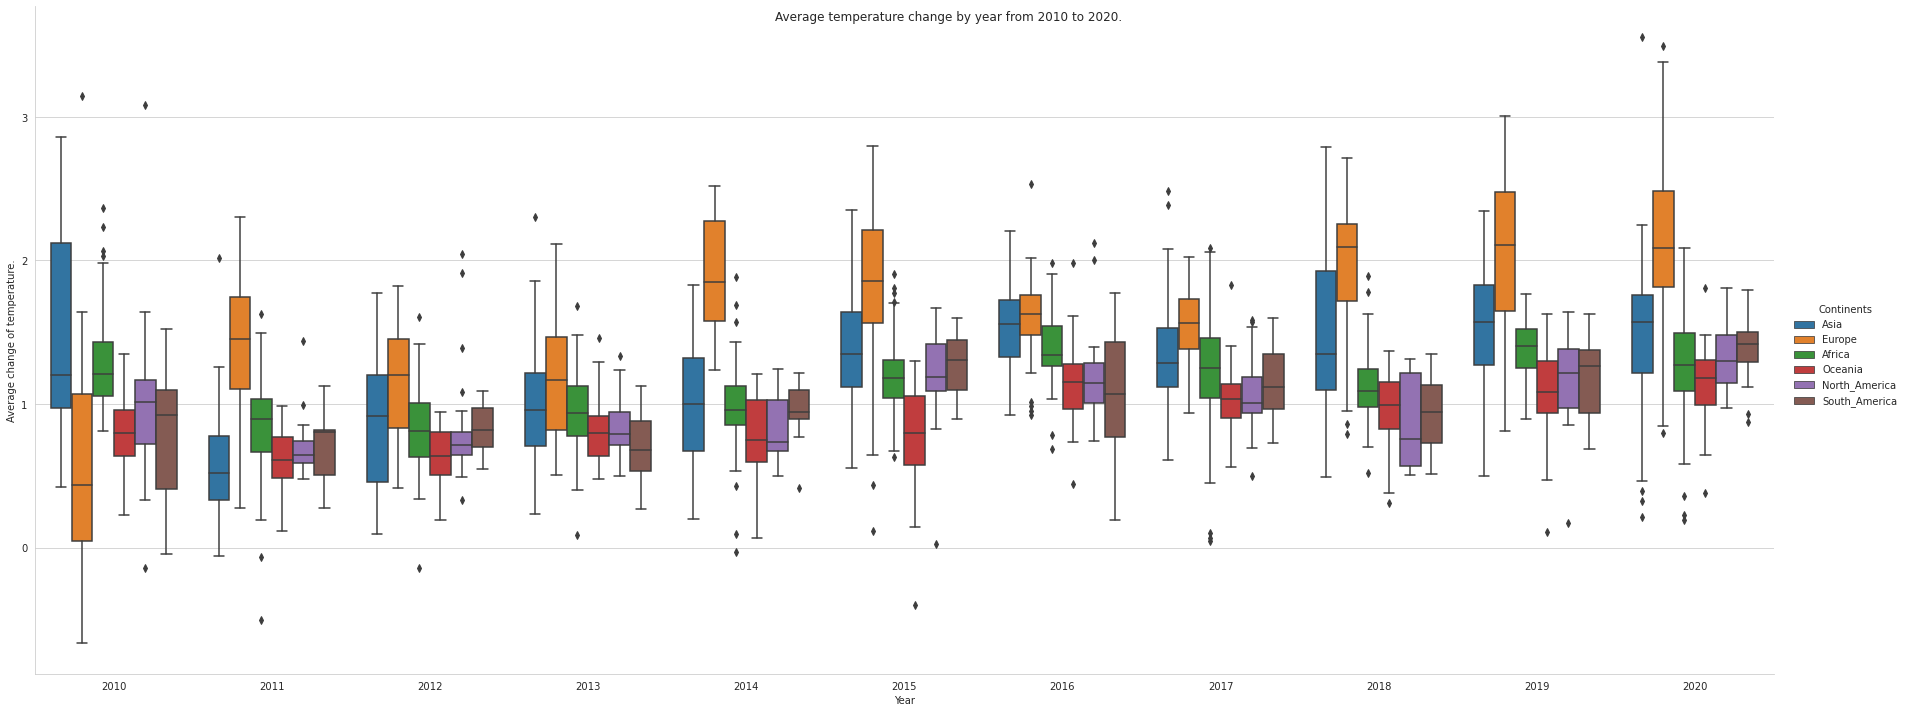

In [306]:
df_2010_2020 = df.query('Year >= 2010 and Year <= 2020')
sns.set_style('whitegrid')
g = sns.catplot(x = 'Year',
                y = 'Average_Temperature_C',
                data = df_2010_2020,
                kind = 'box',
                hue = 'Continents',
                height=10, 
                aspect=2.5
                )
g.fig.suptitle('Average temperature change by year from 2010 to 2020.')
g.set(xlabel = 'Year',
      ylabel = 'Average change of temperature.')
plt.show()

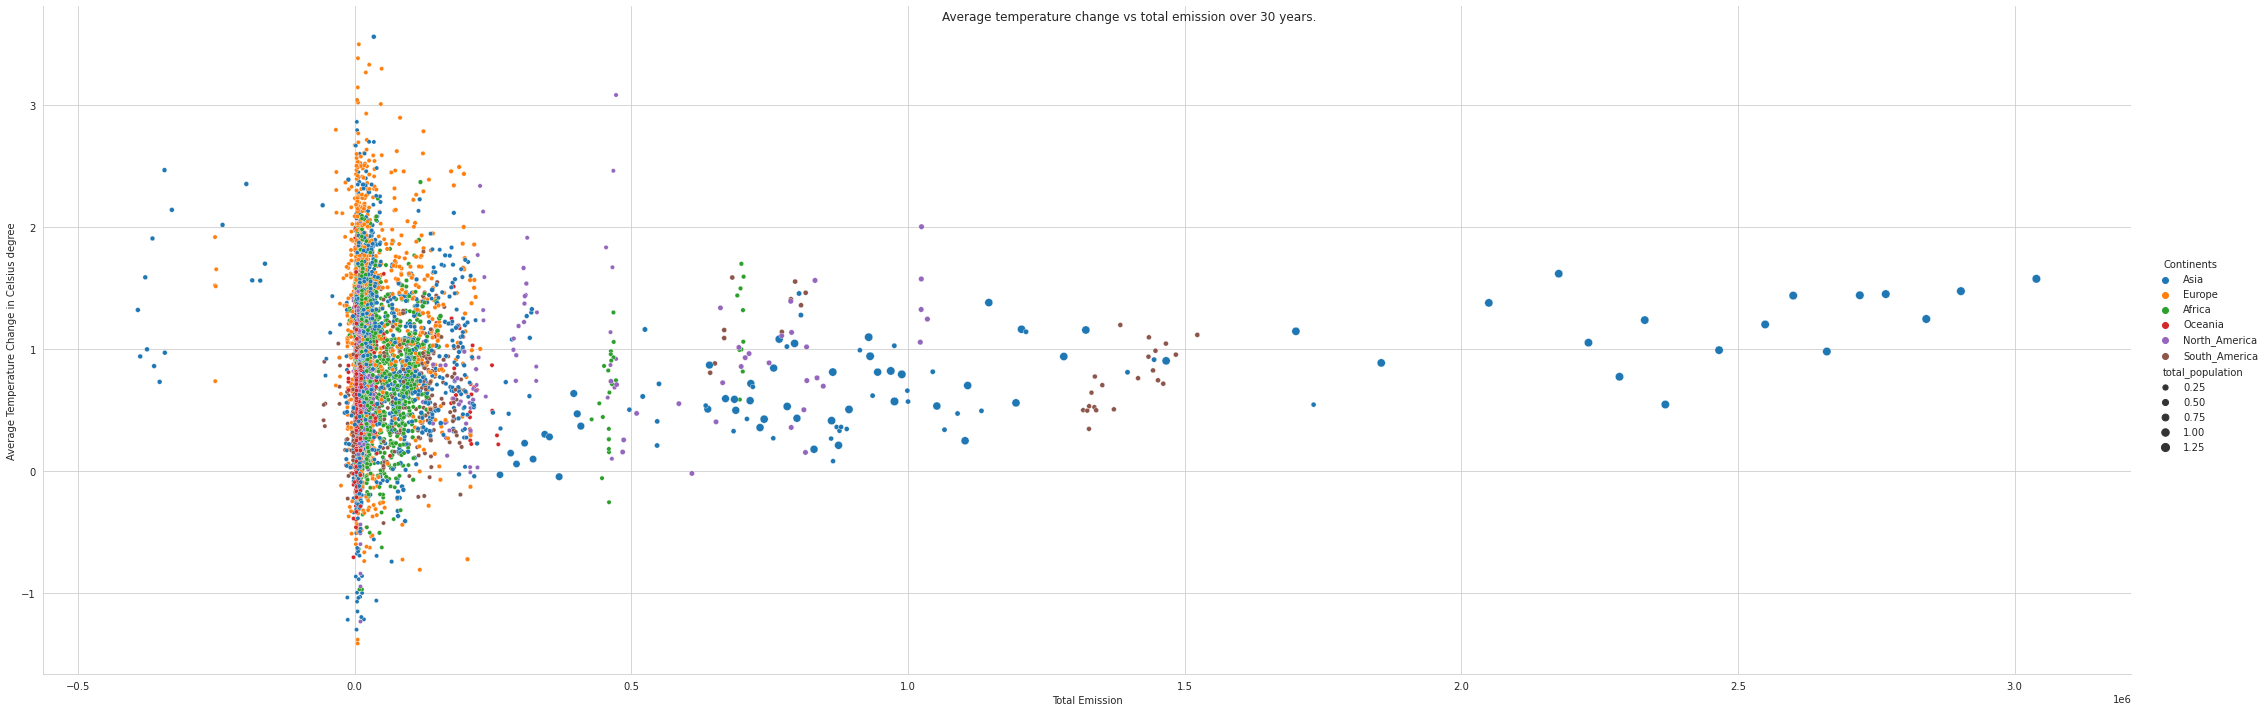

In [393]:
g = sns.relplot(x = 'total_emission',
                y = 'Average_Temperature_C',
                data = df,
                size = 'total_population',
                hue = 'Continents',
                height = 10,
                aspect = 3)
g.fig.suptitle('Average temperature change vs total emission over 30 years.')
g.set(xlabel = 'Total Emission',
      ylabel = 'Average Temperature Change in Celsius degree')

plt.show()

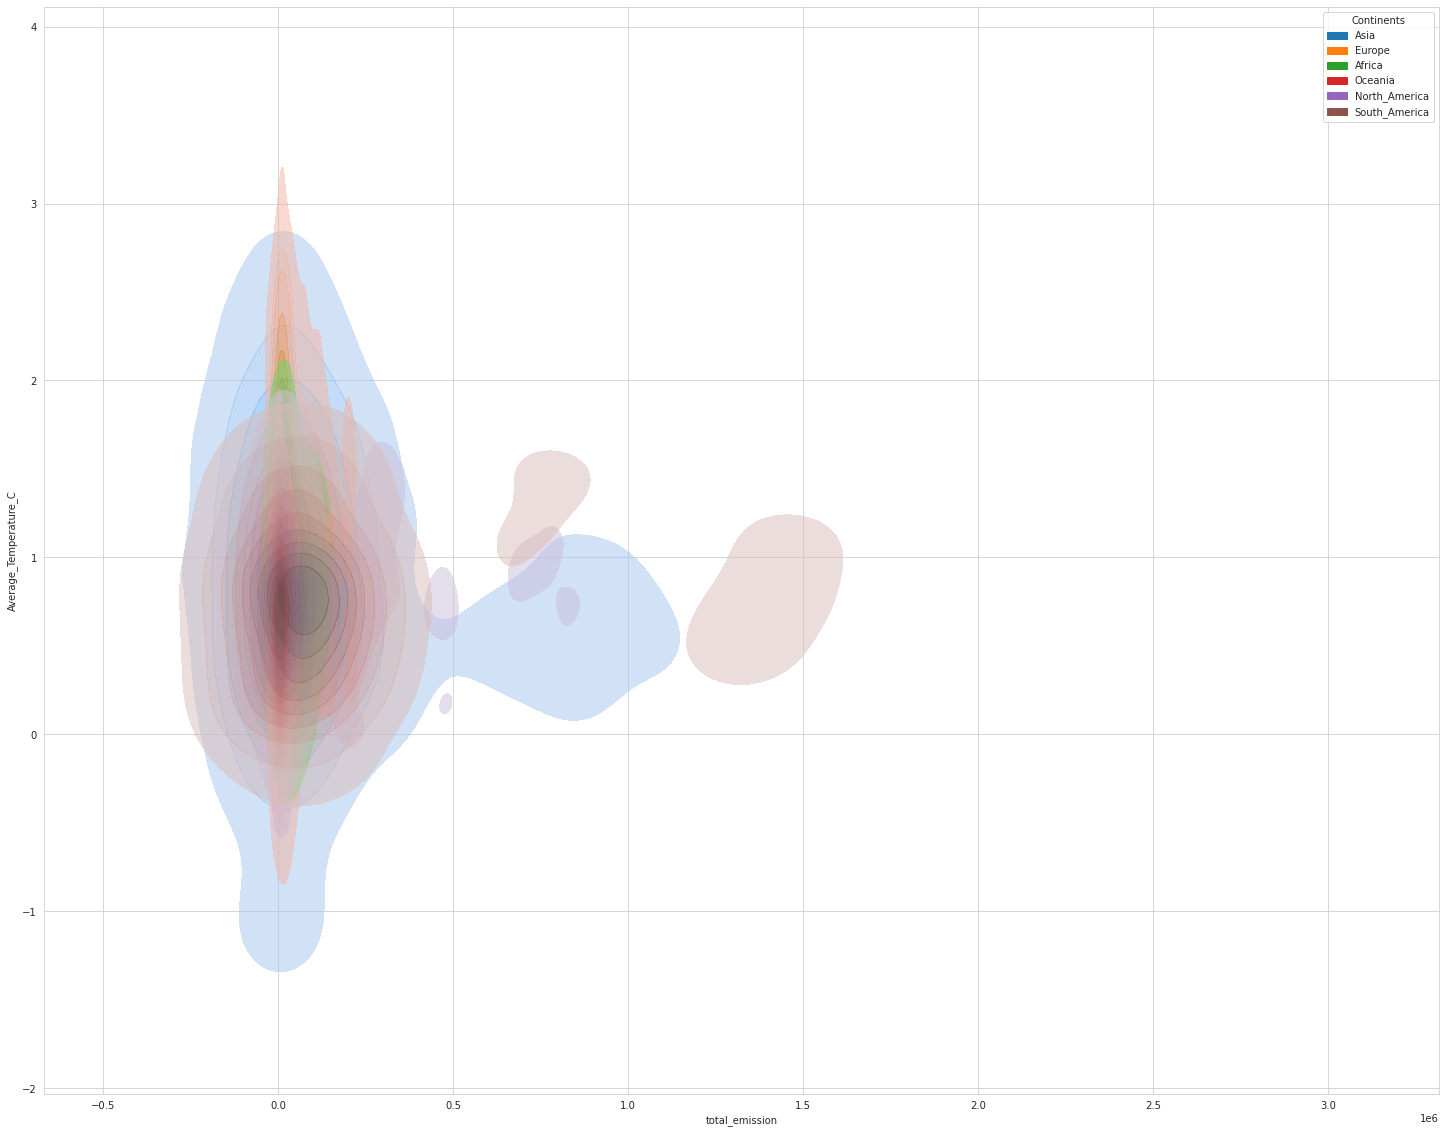

In [394]:
sns.kdeplot(x = 'total_emission',
            y = 'Average_Temperature_C',
            data = df,
            kind = 'kde',
            hue = 'Continents',
            fill = True,
            common_norm = False,
            alpha = 0.5)
plt.show()


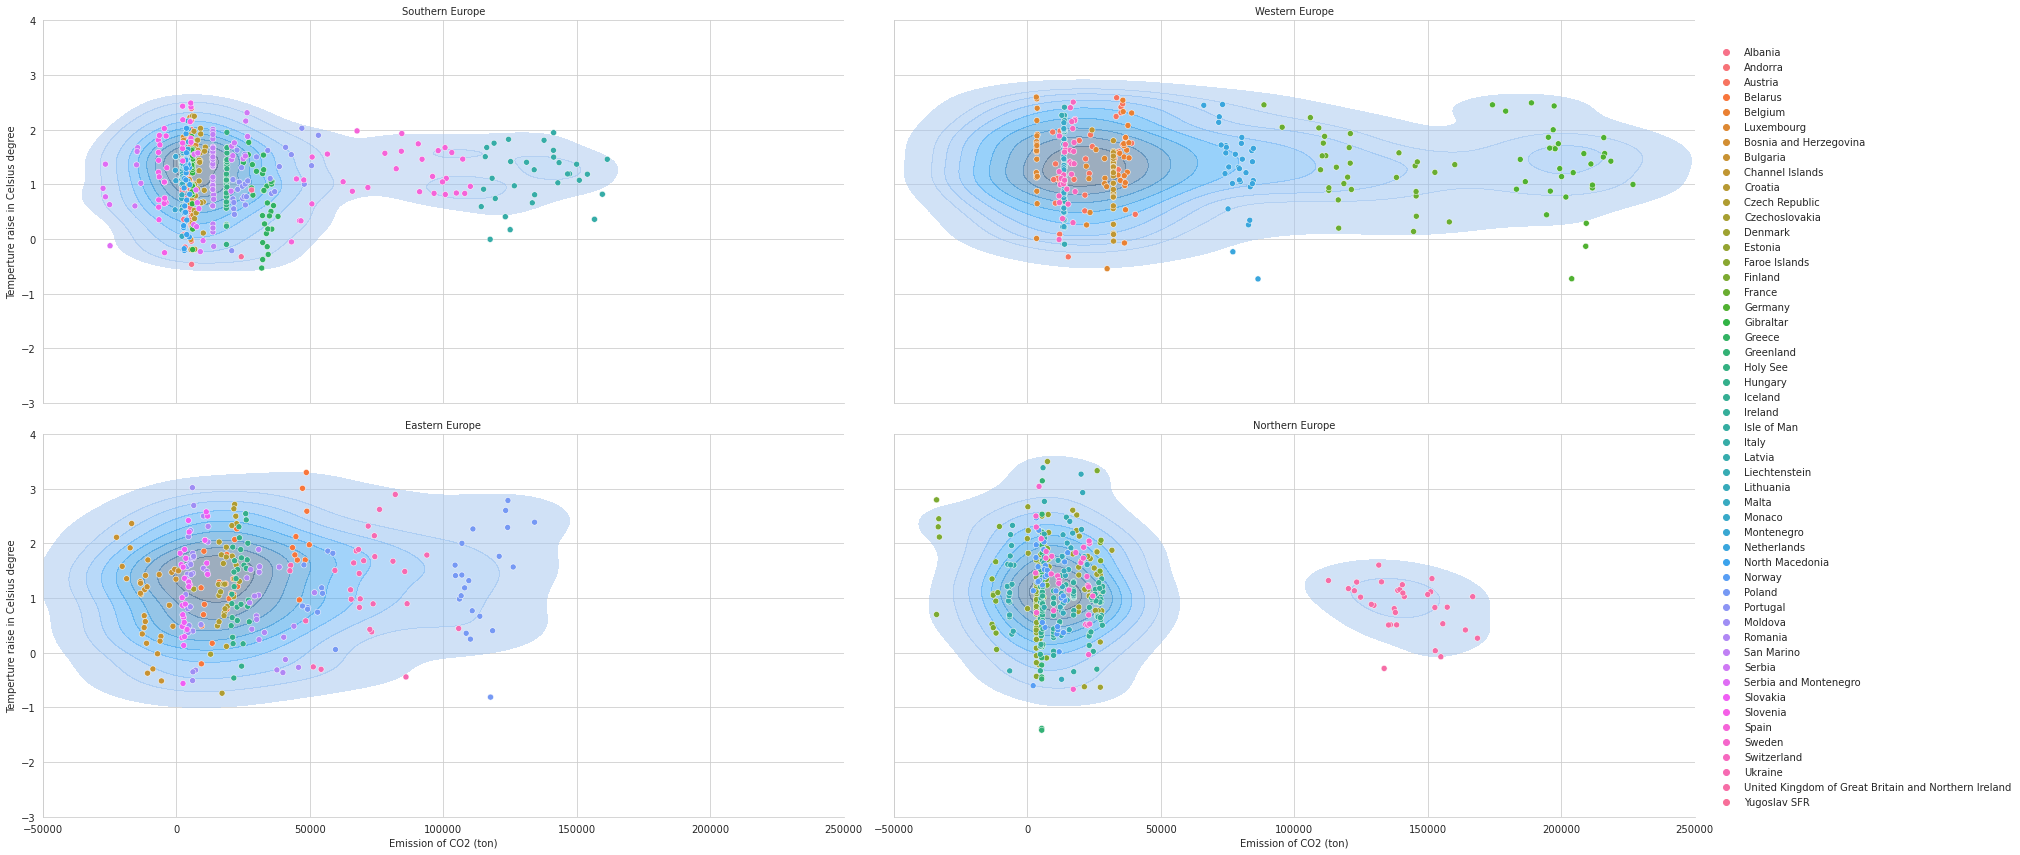

In [477]:
df_europe = df[df['Continents']=='Europe']

g = sns.FacetGrid(df_europe,
                  col="World_regions",
                  col_wrap=2, height=6,
                  aspect = 2,
                  xlim = (-50000,250000),
                  ylim = (-3,4),
                  sharex = True)
g.map(sns.kdeplot,
     "total_emission",
     "Average_Temperature_C",
     fill = True,
     alpha = 0.5)
g.map(sns.scatterplot,
     "total_emission",
     "Average_Temperature_C",
     hue = df_europe['Area'])
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set(xlabel = 'Emission of CO2 (ton)',
      ylabel = 'Temperture raise in Celsius degree')
g.add_legend()
plt.show()

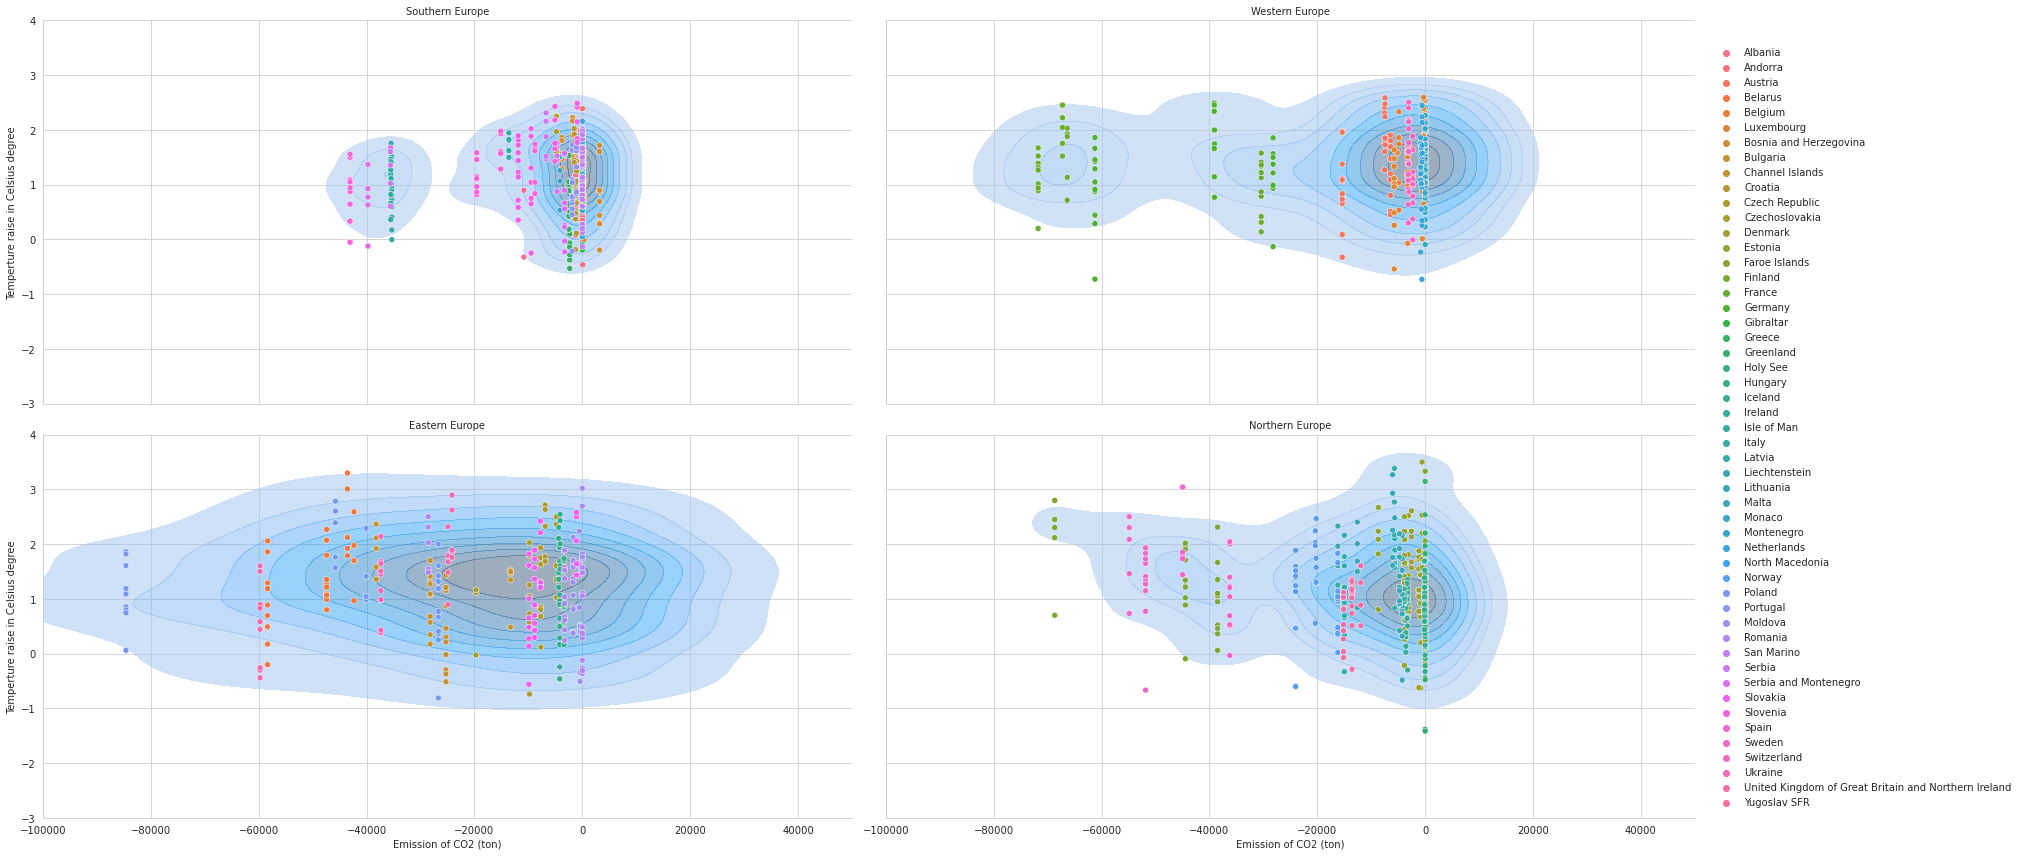

In [527]:
df_europe_neg = df[df['Continents']=='Europe']

g = sns.FacetGrid(df_europe_neg,
                  col="World_regions",
                  col_wrap=2, height=6,
                  aspect = 2,
                  xlim = (-100000,50000),
                  ylim = (-3,4),
                  sharex = True)
g.map(sns.kdeplot,
     "Forestland",
     "Average_Temperature_C",
     fill = True,
     alpha = 0.5)
g.map(sns.scatterplot,
     "Forestland",
     "Average_Temperature_C",
     hue = df_europe_neg['Area'])
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set(xlabel = 'Emission of CO2 (ton)',
      ylabel = 'Temperture raise in Celsius degree')
g.add_legend()
plt.show()

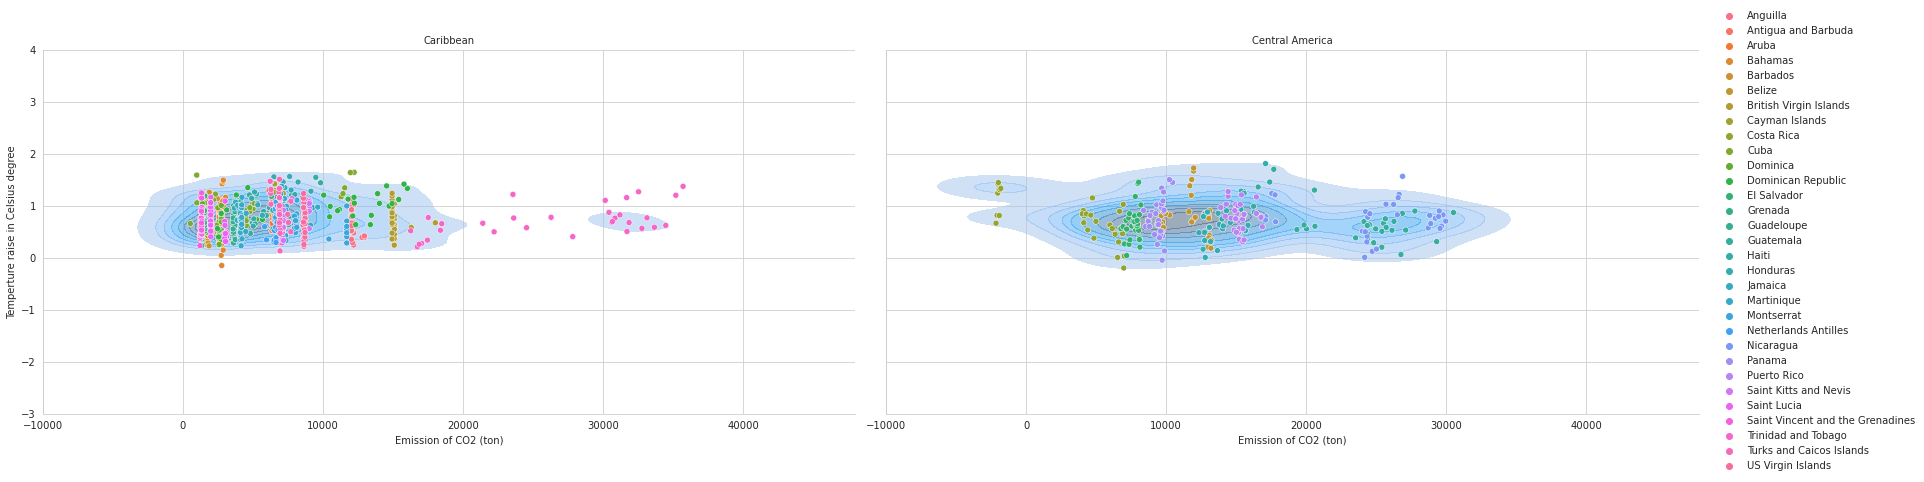

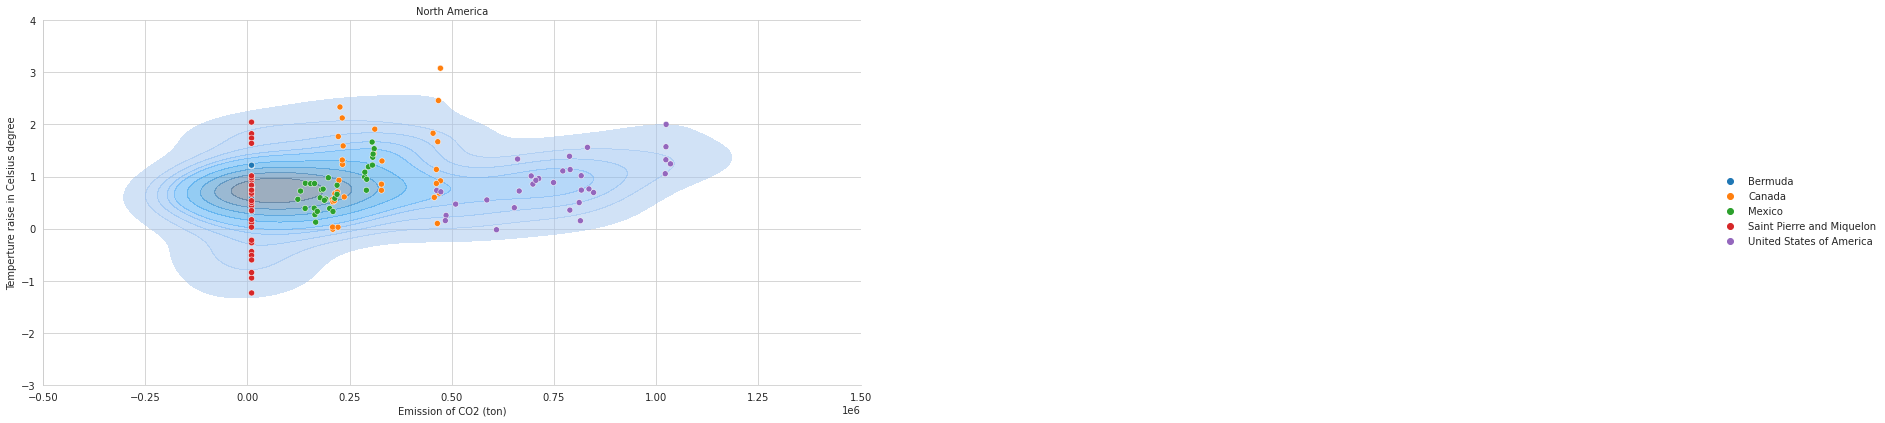

In [473]:
df_northAmerica = df[(df['Continents']=='North_America') & (df['World_regions'] != 'North America')]
g = sns.FacetGrid(df_northAmerica,
                  col="World_regions",
                  col_wrap=2, height=6,
                  aspect = 2,
                  xlim = (-10000,48000),
                  ylim = (-3,4),
                  sharex = True)
g.map(sns.kdeplot,
     "total_emission",
     "Average_Temperature_C",
     fill = True,
     alpha = 0.5)
g.map(sns.scatterplot,
     "total_emission",
     "Average_Temperature_C",
     hue = df_northAmerica['Area'])
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set(xlabel = 'Emission of CO2 (ton)',
      ylabel = 'Temperture raise in Celsius degree')
g.add_legend()
plt.show()

df_NA = df[(df['Continents'] == 'North_America') & (df['World_regions'] == 'North America')]
g = sns.FacetGrid(df_NA,
                  col="World_regions",
                  col_wrap=2, height=6,
                  aspect = 2,
                  xlim = (-500000,1500000),
                  ylim = (-3,4),
                  sharex = True)
g.map(sns.kdeplot,
     "total_emission",
     "Average_Temperature_C",
     fill = True,
     alpha = 0.5)
g.map(sns.scatterplot,
     "total_emission",
     "Average_Temperature_C",
     hue = df_NA['Area'])
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set(xlabel = 'Emission of CO2 (ton)',
      ylabel = 'Temperture raise in Celsius degree')
g.add_legend()
plt.show()

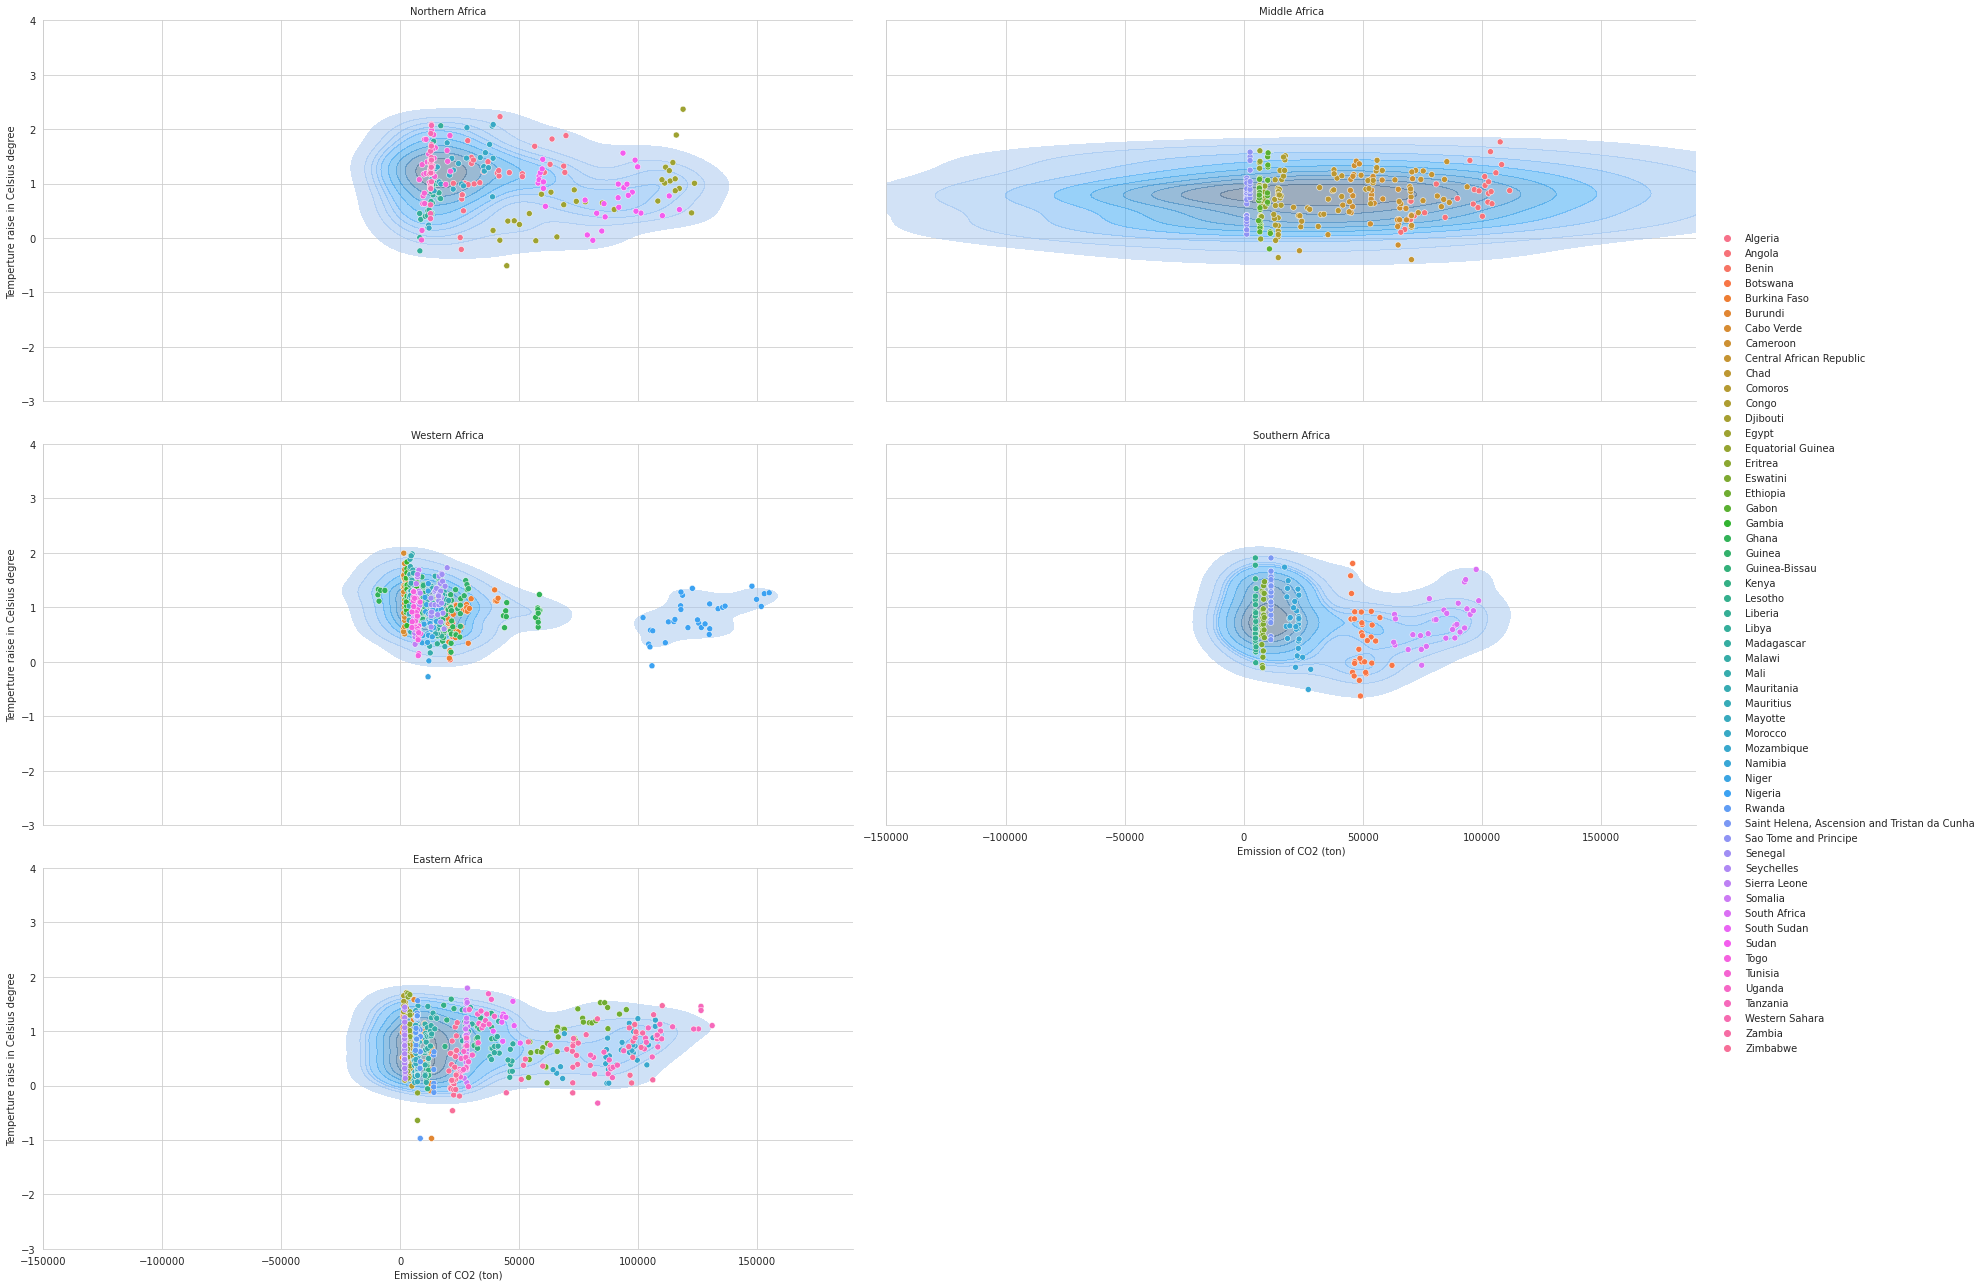

In [460]:
df_africa = df.query("Continents == 'Africa'")
g = sns.FacetGrid(df_africa,
                  col="World_regions",
                  col_wrap=2, height=6,
                  aspect = 2,
                  xlim = (-150000,190000),
                  ylim = (-3,4),
                  sharex = True)
g.map(sns.kdeplot,
     "total_emission",
     "Average_Temperature_C",
     fill = True,
     alpha = 0.5)
g.map(sns.scatterplot,
     "total_emission",
     "Average_Temperature_C",
     hue = df_africa['Area'])
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set(xlabel = 'Emission of CO2 (ton)',
      ylabel = 'Temperture raise in Celsius degree')
g.add_legend()
plt.show()

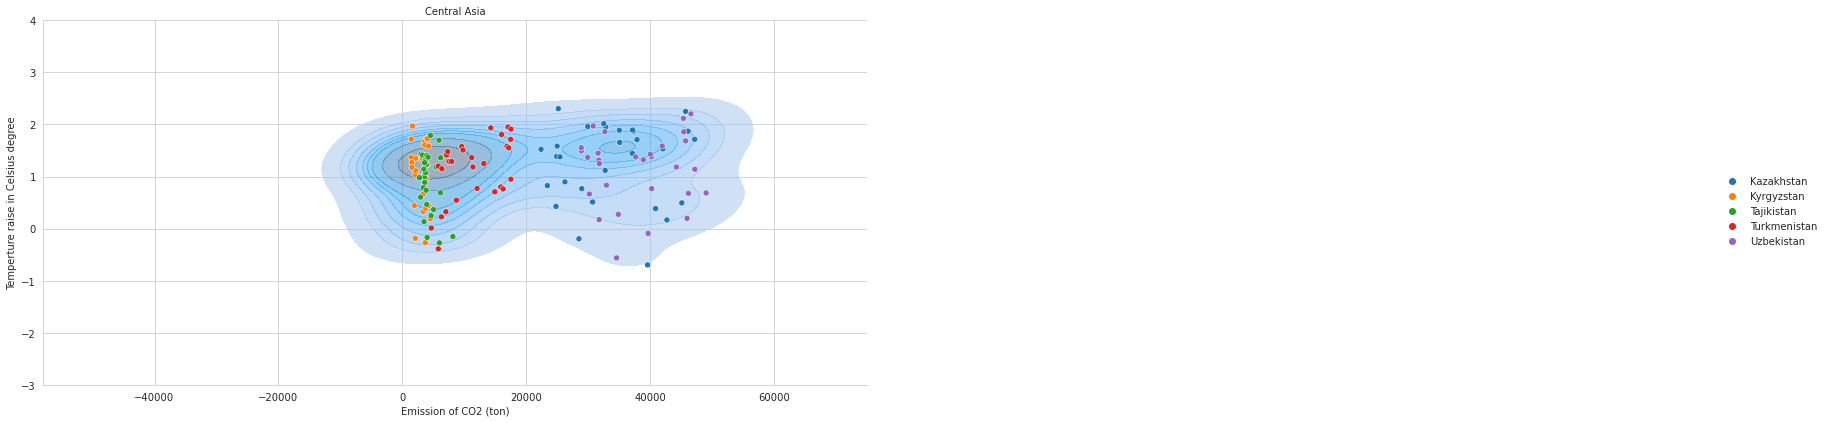

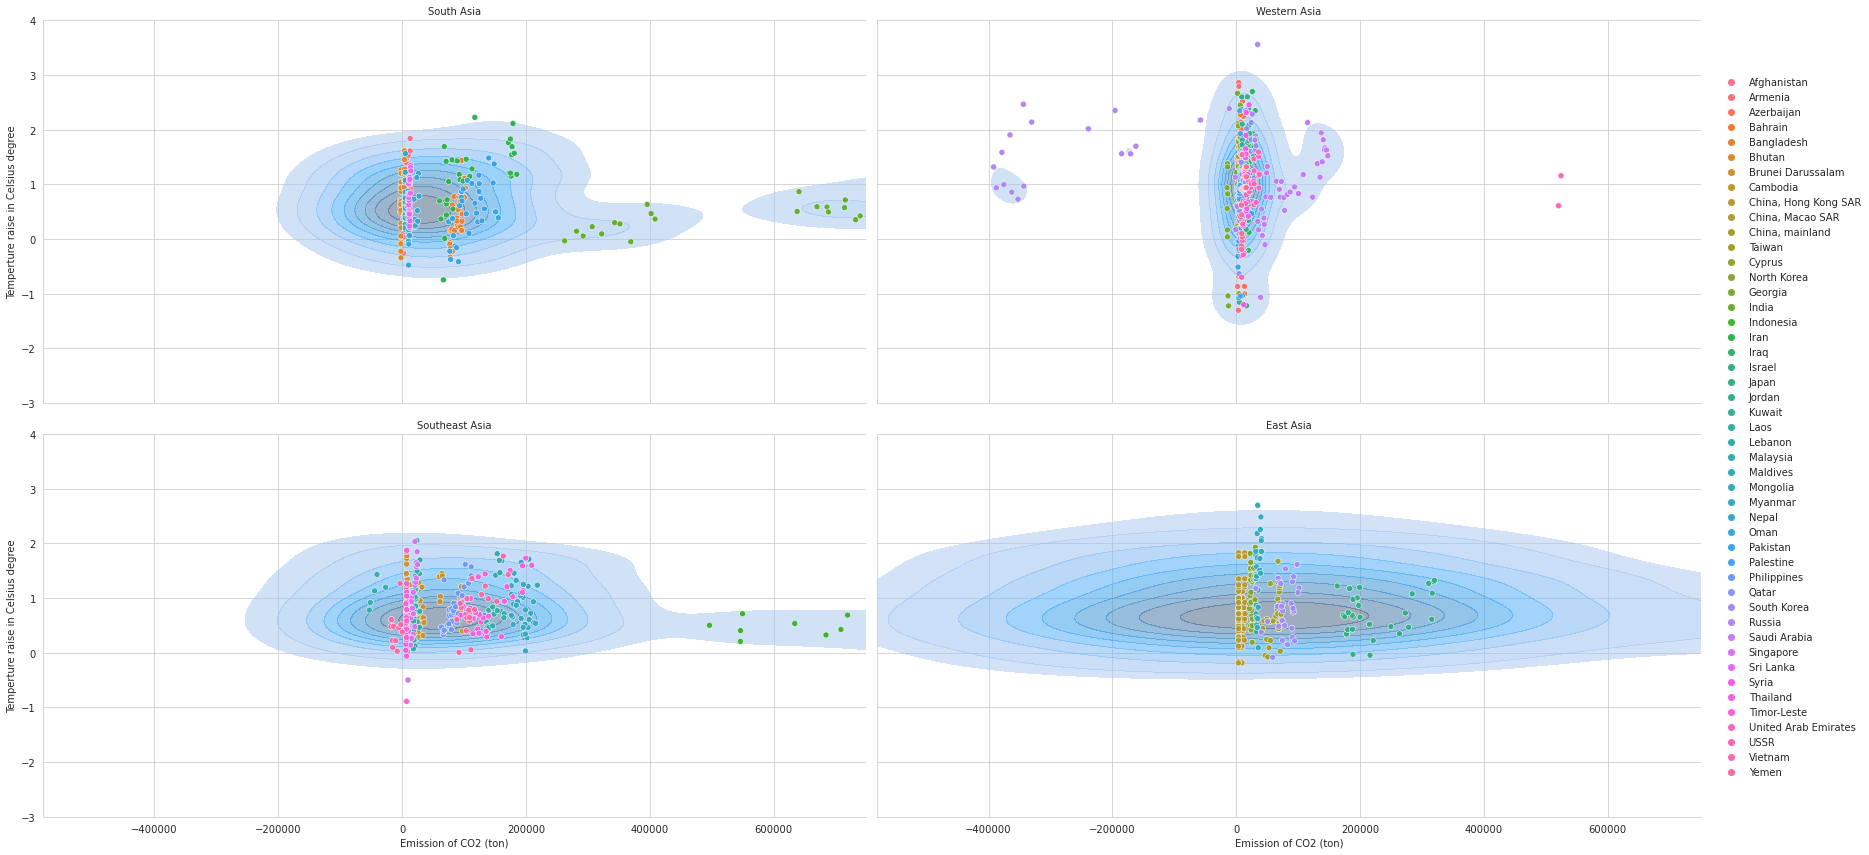

In [496]:
df_CA_WA = df[(df['Continents'] == 'Asia') & (df['World_regions'] == 'Central Asia') ]
g = sns.FacetGrid(df_CA_WA,
                  col="World_regions",
                  col_wrap=2, height=6,
                  aspect = 2,
                  xlim = (-58000,75000),
                  ylim = (-3,4),
                  sharex = True)
g.map(sns.kdeplot,
     "total_emission",
     "Average_Temperature_C",
     fill = True,
     alpha = 0.5)
g.map(sns.scatterplot,
     "total_emission",
     "Average_Temperature_C",
     hue = df_CA_WA['Area'])
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set(xlabel = 'Emission of CO2 (ton)',
      ylabel = 'Temperture raise in Celsius degree')
g.add_legend()
plt.show()

df_asia = df[(df['Continents'] == 'Asia') & (df['World_regions'] != 'Central Asia') ]
g = sns.FacetGrid(df_asia,
                  col="World_regions",
                  col_wrap=2, height=6,
                  aspect = 2,
                  xlim = (-580000,750000),
                  ylim = (-3,4),
                  sharex = True)
g.map(sns.kdeplot,
     "total_emission",
     "Average_Temperature_C",
     fill = True,
     alpha = 0.5)
g.map(sns.scatterplot,
     "total_emission",
     "Average_Temperature_C",
     hue = df_asia['Area'])
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set(xlabel = 'Emission of CO2 (ton)',
      ylabel = 'Temperture raise in Celsius degree')
g.add_legend()
plt.show()

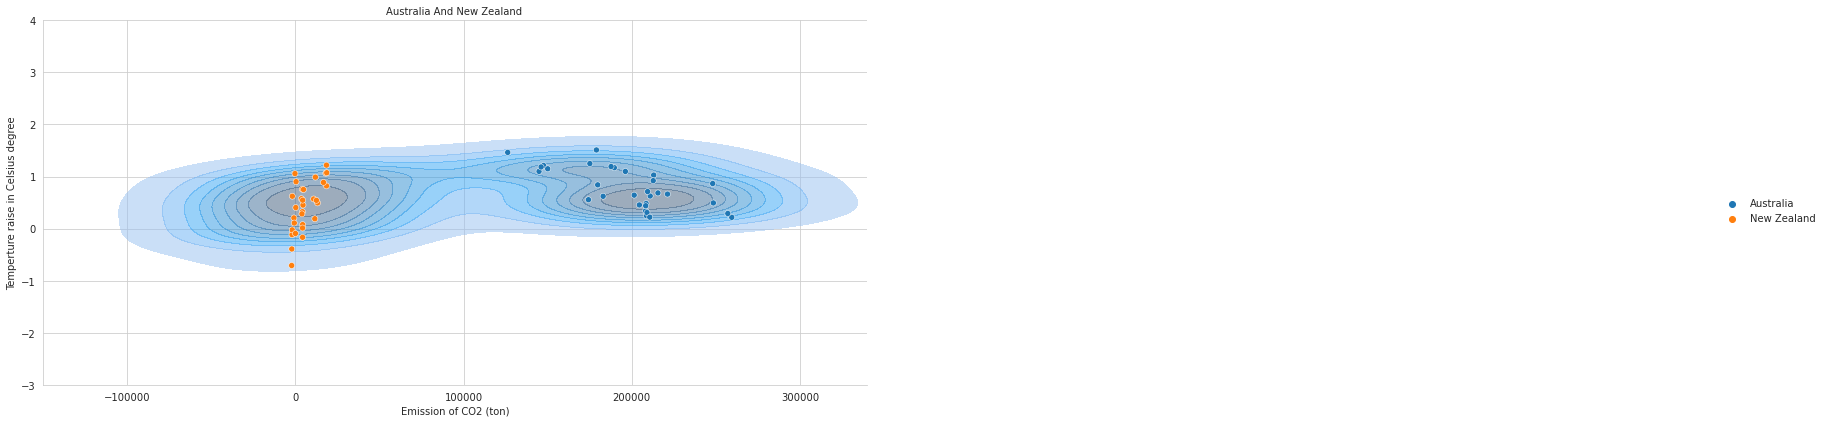

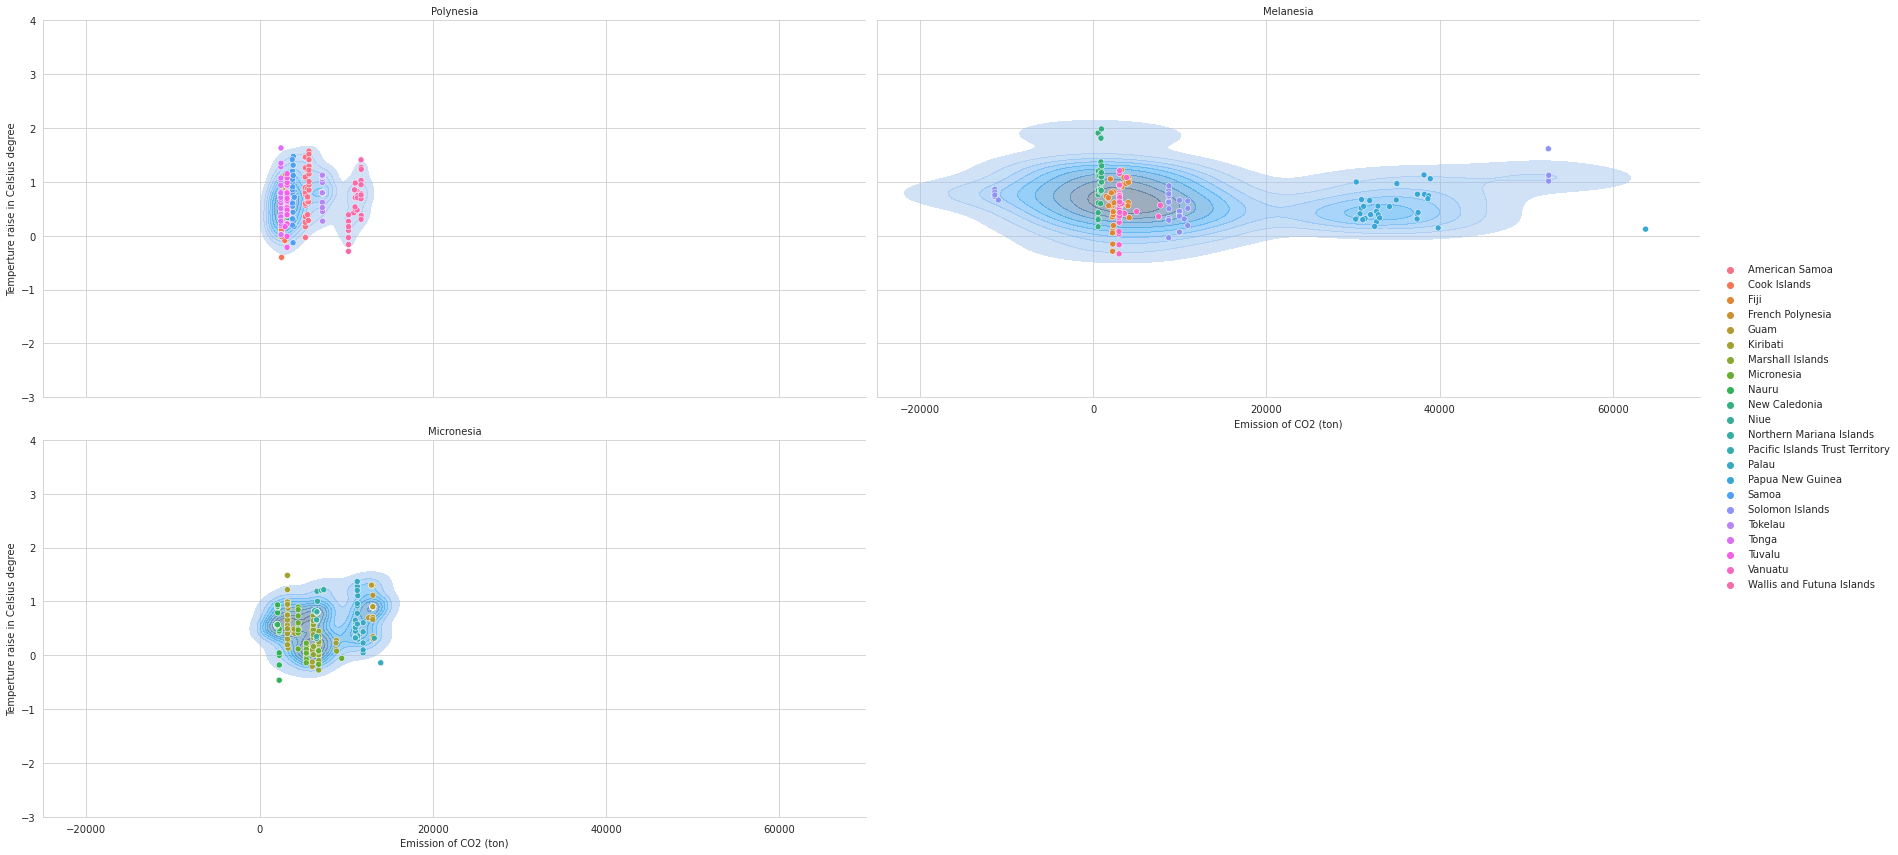

In [533]:
df_AU_NZ = df[(df['Continents'] == 'Oceania') & (df['World_regions'] == 'Australia And New Zealand ')]
g = sns.FacetGrid(df_AU_NZ,
                  col="World_regions",
                  col_wrap=2, height=6,
                  aspect = 2,
                  xlim = (-150000,340000),
                  ylim = (-3,4),
                  sharex = True)
g.map(sns.kdeplot,
     "total_emission",
     "Average_Temperature_C",
     fill = True,
     alpha = 0.5)
g.map(sns.scatterplot,
     "total_emission",
     "Average_Temperature_C",
     hue = df_AU_NZ['Area'])
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set(xlabel = 'Emission of CO2 (ton)',
      ylabel = 'Temperture raise in Celsius degree')
g.add_legend()
plt.show()

df_oceania = df[(df['Continents'] == 'Oceania') & (df['World_regions'] != 'Australia And New Zealand ')]
g = sns.FacetGrid(df_oceania,
                  col="World_regions",
                  col_wrap=2, height=6,
                  aspect = 2,
                  xlim = (-25000,70000),
                  ylim = (-3,4),
                  sharex = True)
g.map(sns.kdeplot,
     "total_emission",
     "Average_Temperature_C",
     fill = True,
     alpha = 0.5)
g.map(sns.scatterplot,
     "total_emission",
     "Average_Temperature_C",
     hue = df_oceania['Area'])
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set(xlabel = 'Emission of CO2 (ton)',
      ylabel = 'Temperture raise in Celsius degree')
g.add_legend()
plt.show()

In [ ]:
correlation = df.groupby('Year').agg({'total_emission':'sum','Average_Temperature_C':'mean','Rural_population':'sum','Urban population':'sum','total_population':'sum'})
correlation.corr()

,total_emission,Average_Temperature_C,Rural_population,Urban population,total_population
total_emission,1.000000,0.911040,0.897446,0.977526,0.973862
Average_Temperature_C,0.911040,1.000000,0.866524,0.911888,0.912830
Rural_population,0.897446,0.866524,1.000000,0.933797,0.951203
Urban population,0.977526,0.911888,0.933797,1.000000,0.998632
total_population,0.973862,0.912830,0.951203,0.998632,1.000000


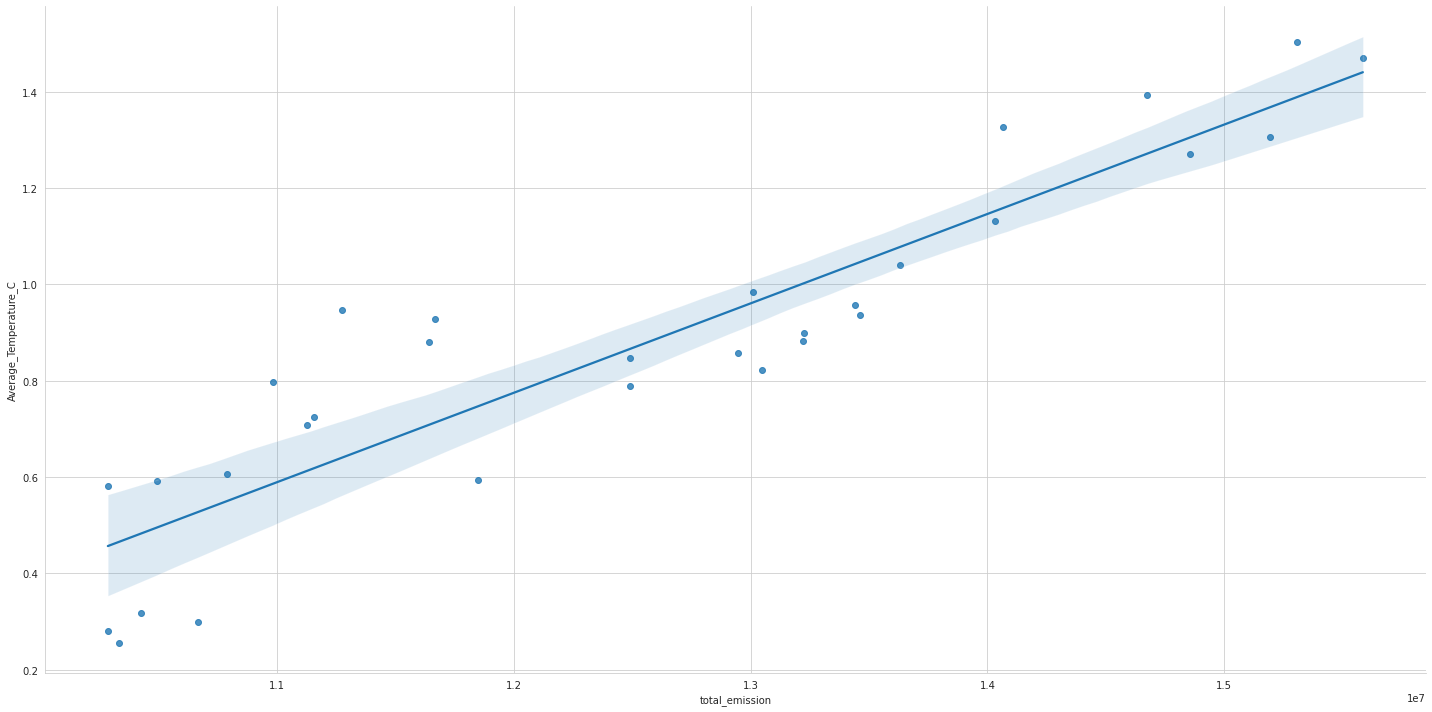

In [ ]:
correlation['Year'] = correlation.index
sns.lmplot(data = correlation,
            x = 'total_emission',
            y = 'Average_Temperature_C',
            height = 10,
            aspect = 2,
            fit_reg = True)
plt.show()
